# 04-08. 산탄데르 고객 만족 예측

- 370개의 피처를 가진 데이터
- 클래스 레이블 명 TARGET, 1이면 불만을 가진 고객, 0이면 만족한 고객
- 모델의 성능 평가는 ROC-AUC로 평가

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv('train.csv', encoding='latin-1')
print('dataset shape :', cust_df.shape)
cust_df.head(3)

dataset shape : (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [2]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [3]:
print(cust_df['TARGET'].value_counts())
unsatisfide_cnt = cust_df[cust_df['TARGET'] ==1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfide 비율은 {0:.2f}'.format((unsatisfide_cnt/total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfide 비율은 0.04


In [4]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [5]:
print(cust_df.var3.value_counts()[:10]) # var3 값이 -999999(NaH 값을 이렇게 처리)인 데이터가 116개 존재

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64


- -999999값을 가장 많이 분포하는 2로 대체
- ID 피처는 단순 식별자에 불과하므로 드롭
- 클래스 데이터와 피처 데이터 분리

In [6]:
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

# 피처 세트와 레이블 세트 분리. 레이블 칼럼은 가장 마지막(-1)
X_features = cust_df.iloc[:,:-1]
y_labels = cust_df.iloc[:,-1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

# 4% 정도의 불만족 데이터

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


## XGBoost 모델 학습과 하이퍼 파라미터 튜닝

In [8]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행.
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC : {0:.4f}'.format(xgb_roc_score))

C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.82005	validation_1-auc:0.81157
[1]	validation_0-auc:0.83400	validation_1-auc:0.82452
[2]	validation_0-auc:0.83870	validation_1-auc:0.82746
[3]	validation_0-auc:0.84419	validation_1-auc:0.82922
[4]	validation_0-auc:0.84783	validation_1-auc:0.83298
[5]	validation_0-auc:0.85125	validation_1-auc:0.83500
[6]	validation_0-auc:0.85501	validation_1-auc:0.83653
[7]	validation_0-auc:0.85831	validation_1-auc:0.83782
[8]	validation_0-auc:0.86143	validation_1-auc:0.83802
[9]	validation_0-auc:0.86452	validation_1-auc:0.83914
[10]	validation_0-auc:0.86717	validation_1-auc:0.83954
[11]	validation_0-auc:0.87013	validation_1-auc:0.83983
[12]	validation_0-auc:0.87369	validation_1-auc:0.84033
[13]	validation_0-auc:0.87620	validation_1-auc:0.84054
[14]	validation_0-auc:0.87799	validation_1-auc:0.84135
[15]	validation_0-auc:0.88072	validation_1-auc:0.84117
[16]	validation_0-auc:0.88238	validation_1-auc:0.84101
[17]	validation_0-auc:0.88354	validation_1-auc:0.84071
[18]	validation_0-au

### 하이퍼 파라미터 튜닝
- max_depth, min_child_weight, colsample_bytree만 튜닝 대상
- 먼저 2~3개의 피라미터 결합 후 최적의 파라미터랑 다시 1~2개 파라미터랑 결합

In [10]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimator=100)

params = {'max_depth':[5,7], 'min_child_weight':[1,3], 'colsample_bytree':[0.5, 0.75]}

# 하이퍼 파리미터 테스트의 수행속도를 향상시키기 위해 cv를 지정하지 않음
gridcv = GridSearchCV(xgb_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc',
          eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터 :', gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')

C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:14:39] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.80038	validation_1-auc:0.79818
[1]	validation_0-auc:0.81995	validation_1-auc:0.81649
[2]	validation_0-auc:0.82649	validation_1-auc:0.82081
[3]	validation_0-auc:0.83183	validation_1-auc:0.82450
[4]	validation_0-auc:0.83650	validation_1-auc:0.82830
[5]	validation_0-auc:0.83943	validation_1-auc:0.83588
[6]	validation_0-auc:0.83793	validation_1-auc:0.83169
[7]	validation_0-auc:0.84466	validation_1-auc:0.83748
[8]	validation_0-auc:0.84785	validation_1-auc:0.83735
[9]	validation_0-auc:0.84684	validation_1-auc:0.83529
[10]	validation_0-auc:0.84626	validation_1-auc:0.83278
[11]	validation_0-auc:0.84769	validation_1-

C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:14:44] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.80213	validation_1-auc:0.80332
[1]	validation_0-auc:0.82227	validation_1-auc:0.81899
[2]	validation_0-auc:0.82628	validation_1-auc:0.81889
[3]	validation_0-auc:0.83149	validation_1-auc:0.82316
[4]	validation_0-auc:0.83625	validation_1-auc:0.82778
[5]	validation_0-auc:0.84036	validation_1-auc:0.83454
[6]	validation_0-auc:0.83978	validation_1-auc:0.83297
[7]	validation_0-auc:0.84679	validation_1-auc:0.83684
[8]	validation_0-auc:0.85133	validation_1-auc:0.84043
[9]	validation_0-auc:0.85033	validation_1-auc:0.83983
[10]	validation_0-auc:0.84845	validation_1-auc:0.83700
[11]	validation_0-auc:0.84800	validation_1-

C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:14:48] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.78960	validation_1-auc:0.78524
[1]	validation_0-auc:0.81529	validation_1-auc:0.80726
[2]	validation_0-auc:0.82690	validation_1-auc:0.81770
[3]	validation_0-auc:0.83341	validation_1-auc:0.82620
[4]	validation_0-auc:0.83838	validation_1-auc:0.83019
[5]	validation_0-auc:0.83867	validation_1-auc:0.83379
[6]	validation_0-auc:0.83848	validation_1-auc:0.83198
[7]	validation_0-auc:0.84567	validation_1-auc:0.83512
[8]	validation_0-auc:0.84913	validation_1-auc:0.83749
[9]	validation_0-auc:0.84857	validation_1-auc:0.83704
[10]	validation_0-auc:0.84865	validation_1-auc:0.83417
[11]	validation_0-auc:0.84869	validation_1-

C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:14:51] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.80872	validation_1-auc:0.80994
[1]	validation_0-auc:0.82206	validation_1-auc:0.82271
[2]	validation_0-auc:0.82797	validation_1-auc:0.82783
[3]	validation_0-auc:0.83032	validation_1-auc:0.82847
[4]	validation_0-auc:0.83466	validation_1-auc:0.83038
[5]	validation_0-auc:0.83700	validation_1-auc:0.83494
[6]	validation_0-auc:0.83780	validation_1-auc:0.83406
[7]	validation_0-auc:0.84390	validation_1-auc:0.83682
[8]	validation_0-auc:0.84662	validation_1-auc:0.83725
[9]	validation_0-auc:0.84673	validation_1-auc:0.83611
[10]	validation_0-auc:0.84624	validation_1-auc:0.83592
[11]	validation_0-auc:0.84788	validation_1-

C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:14:55] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.79746	validation_1-auc:0.78867
[1]	validation_0-auc:0.82052	validation_1-auc:0.81119
[2]	validation_0-auc:0.82631	validation_1-auc:0.81683
[3]	validation_0-auc:0.83028	validation_1-auc:0.82137
[4]	validation_0-auc:0.83459	validation_1-auc:0.82429
[5]	validation_0-auc:0.83813	validation_1-auc:0.83140
[6]	validation_0-auc:0.83793	validation_1-auc:0.83272
[7]	validation_0-auc:0.84418	validation_1-auc:0.83754
[8]	validation_0-auc:0.84910	validation_1-auc:0.83910
[9]	validation_0-auc:0.84959	validation_1-auc:0.83905
[10]	validation_0-auc:0.84853	validation_1-auc:0.83609
[11]	validation_0-auc:0.84829	validation_1-

C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:15:01] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.80017	validation_1-auc:0.79807
[1]	validation_0-auc:0.81942	validation_1-auc:0.81640
[2]	validation_0-auc:0.82810	validation_1-auc:0.82171
[3]	validation_0-auc:0.83289	validation_1-auc:0.82561
[4]	validation_0-auc:0.83675	validation_1-auc:0.82903
[5]	validation_0-auc:0.83834	validation_1-auc:0.83517
[6]	validation_0-auc:0.83721	validation_1-auc:0.83155
[7]	validation_0-auc:0.84342	validation_1-auc:0.83760
[8]	validation_0-auc:0.84683	validation_1-auc:0.83815
[9]	validation_0-auc:0.84544	validation_1-auc:0.83634
[10]	validation_0-auc:0.84473	validation_1-auc:0.83314
[11]	validation_0-auc:0.84538	validation_1-

C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:15:06] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.80218	validation_1-auc:0.80341
[1]	validation_0-auc:0.82236	validation_1-auc:0.81873
[2]	validation_0-auc:0.82653	validation_1-auc:0.81934
[3]	validation_0-auc:0.83082	validation_1-auc:0.82309
[4]	validation_0-auc:0.83532	validation_1-auc:0.82680
[5]	validation_0-auc:0.84024	validation_1-auc:0.83466
[6]	validation_0-auc:0.84031	validation_1-auc:0.83255
[7]	validation_0-auc:0.84778	validation_1-auc:0.83692
[8]	validation_0-auc:0.85100	validation_1-auc:0.83867
[9]	validation_0-auc:0.84889	validation_1-auc:0.83668
[10]	validation_0-auc:0.84808	validation_1-auc:0.83471
[11]	validation_0-auc:0.84722	validation_1-

C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:15:11] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.78960	validation_1-auc:0.78486
[1]	validation_0-auc:0.82137	validation_1-auc:0.81511
[2]	validation_0-auc:0.82922	validation_1-auc:0.82135
[3]	validation_0-auc:0.83439	validation_1-auc:0.82568
[4]	validation_0-auc:0.83884	validation_1-auc:0.83051
[5]	validation_0-auc:0.83968	validation_1-auc:0.83361
[6]	validation_0-auc:0.84005	validation_1-auc:0.83242
[7]	validation_0-auc:0.84569	validation_1-auc:0.83632
[8]	validation_0-auc:0.84887	validation_1-auc:0.83805
[9]	validation_0-auc:0.84762	validation_1-auc:0.83609
[10]	validation_0-auc:0.84698	validation_1-auc:0.83304
[11]	validation_0-auc:0.84675	validation_1-

C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:15:17] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.80810	validation_1-auc:0.80965
[1]	validation_0-auc:0.82427	validation_1-auc:0.82362
[2]	validation_0-auc:0.83170	validation_1-auc:0.82841
[3]	validation_0-auc:0.83247	validation_1-auc:0.82923
[4]	validation_0-auc:0.83693	validation_1-auc:0.83156
[5]	validation_0-auc:0.83834	validation_1-auc:0.83469
[6]	validation_0-auc:0.83914	validation_1-auc:0.83193
[7]	validation_0-auc:0.84438	validation_1-auc:0.83496
[8]	validation_0-auc:0.84872	validation_1-auc:0.83647
[9]	validation_0-auc:0.84782	validation_1-auc:0.83565
[10]	validation_0-auc:0.84706	validation_1-auc:0.83417
[11]	validation_0-auc:0.84742	validation_1-

C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:15:22] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.79677	validation_1-auc:0.78874
[1]	validation_0-auc:0.82110	validation_1-auc:0.81349
[2]	validation_0-auc:0.82828	validation_1-auc:0.82198
[3]	validation_0-auc:0.83317	validation_1-auc:0.82563
[4]	validation_0-auc:0.83631	validation_1-auc:0.82751
[5]	validation_0-auc:0.83974	validation_1-auc:0.83305
[6]	validation_0-auc:0.83923	validation_1-auc:0.83498
[7]	validation_0-auc:0.84557	validation_1-auc:0.83903
[8]	validation_0-auc:0.84974	validation_1-auc:0.83944
[9]	validation_0-auc:0.85001	validation_1-auc:0.83864
[10]	validation_0-auc:0.84864	validation_1-auc:0.83410
[11]	validation_0-auc:0.84873	validation_1-

C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:15:27] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.80806	validation_1-auc:0.80811
[1]	validation_0-auc:0.82666	validation_1-auc:0.82313
[2]	validation_0-auc:0.83369	validation_1-auc:0.82592
[3]	validation_0-auc:0.83979	validation_1-auc:0.82960
[4]	validation_0-auc:0.84752	validation_1-auc:0.83316
[5]	validation_0-auc:0.85177	validation_1-auc:0.83790
[6]	validation_0-auc:0.85273	validation_1-auc:0.83369
[7]	validation_0-auc:0.86098	validation_1-auc:0.83641
[8]	validation_0-auc:0.86683	validation_1-auc:0.83754
[9]	validation_0-auc:0.86629	validation_1-auc:0.83612
[10]	validation_0-auc:0.86669	validation_1-auc:0.83276
[11]	validation_0-auc:0.86748	validation_1-

C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:15:33] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.81735	validation_1-auc:0.81666
[1]	validation_0-auc:0.83258	validation_1-auc:0.82248
[2]	validation_0-auc:0.83857	validation_1-auc:0.82480
[3]	validation_0-auc:0.84268	validation_1-auc:0.82862
[4]	validation_0-auc:0.84891	validation_1-auc:0.82859
[5]	validation_0-auc:0.85236	validation_1-auc:0.83437
[6]	validation_0-auc:0.85399	validation_1-auc:0.83198
[7]	validation_0-auc:0.86173	validation_1-auc:0.83400
[8]	validation_0-auc:0.86836	validation_1-auc:0.83715
[9]	validation_0-auc:0.86735	validation_1-auc:0.83592
[10]	validation_0-auc:0.87033	validation_1-auc:0.83490
[11]	validation_0-auc:0.87113	validation_1-

C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:15:39] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.81190	validation_1-auc:0.81368
[1]	validation_0-auc:0.83058	validation_1-auc:0.82360
[2]	validation_0-auc:0.83871	validation_1-auc:0.82808
[3]	validation_0-auc:0.84651	validation_1-auc:0.83504
[4]	validation_0-auc:0.85346	validation_1-auc:0.83588
[5]	validation_0-auc:0.85500	validation_1-auc:0.83854
[6]	validation_0-auc:0.85594	validation_1-auc:0.83389
[7]	validation_0-auc:0.86321	validation_1-auc:0.83564
[8]	validation_0-auc:0.86782	validation_1-auc:0.83727
[9]	validation_0-auc:0.86741	validation_1-auc:0.83694
[10]	validation_0-auc:0.86851	validation_1-auc:0.83383
[11]	validation_0-auc:0.86803	validation_1-

C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:15:45] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.82030	validation_1-auc:0.81629
[1]	validation_0-auc:0.83024	validation_1-auc:0.82173
[2]	validation_0-auc:0.83603	validation_1-auc:0.82795
[3]	validation_0-auc:0.83914	validation_1-auc:0.83037
[4]	validation_0-auc:0.84758	validation_1-auc:0.83519
[5]	validation_0-auc:0.84991	validation_1-auc:0.83676
[6]	validation_0-auc:0.85023	validation_1-auc:0.83439
[7]	validation_0-auc:0.85673	validation_1-auc:0.83643
[8]	validation_0-auc:0.86269	validation_1-auc:0.83988
[9]	validation_0-auc:0.86402	validation_1-auc:0.83932
[10]	validation_0-auc:0.86652	validation_1-auc:0.83750
[11]	validation_0-auc:0.86777	validation_1-

C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:15:52] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.81225	validation_1-auc:0.80359
[1]	validation_0-auc:0.83534	validation_1-auc:0.82476
[2]	validation_0-auc:0.84082	validation_1-auc:0.82714
[3]	validation_0-auc:0.84387	validation_1-auc:0.82947
[4]	validation_0-auc:0.84907	validation_1-auc:0.83259
[5]	validation_0-auc:0.85165	validation_1-auc:0.83570
[6]	validation_0-auc:0.85309	validation_1-auc:0.83040
[7]	validation_0-auc:0.85951	validation_1-auc:0.83501
[8]	validation_0-auc:0.86792	validation_1-auc:0.83628
[9]	validation_0-auc:0.86835	validation_1-auc:0.83515
[10]	validation_0-auc:0.87052	validation_1-auc:0.83186
[11]	validation_0-auc:0.87093	validation_1-

C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:15:58] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.81357	validation_1-auc:0.81132
[1]	validation_0-auc:0.82749	validation_1-auc:0.82171
[2]	validation_0-auc:0.83452	validation_1-auc:0.82607
[3]	validation_0-auc:0.83770	validation_1-auc:0.82796
[4]	validation_0-auc:0.84644	validation_1-auc:0.83296
[5]	validation_0-auc:0.85065	validation_1-auc:0.83466
[6]	validation_0-auc:0.85136	validation_1-auc:0.83206
[7]	validation_0-auc:0.85926	validation_1-auc:0.83786
[8]	validation_0-auc:0.86422	validation_1-auc:0.83754
[9]	validation_0-auc:0.86344	validation_1-auc:0.83573
[10]	validation_0-auc:0.86341	validation_1-auc:0.83373
[11]	validation_0-auc:0.86335	validation_1-

C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:16:04] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.81707	validation_1-auc:0.81668
[1]	validation_0-auc:0.83059	validation_1-auc:0.82461
[2]	validation_0-auc:0.83731	validation_1-auc:0.82740
[3]	validation_0-auc:0.84251	validation_1-auc:0.82901
[4]	validation_0-auc:0.84709	validation_1-auc:0.82948
[5]	validation_0-auc:0.85009	validation_1-auc:0.83382
[6]	validation_0-auc:0.85057	validation_1-auc:0.82627
[7]	validation_0-auc:0.85827	validation_1-auc:0.83007
[8]	validation_0-auc:0.86455	validation_1-auc:0.83361
[9]	validation_0-auc:0.86340	validation_1-auc:0.83205
[10]	validation_0-auc:0.86262	validation_1-auc:0.83078
[11]	validation_0-auc:0.86316	validation_1-

C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:16:09] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.81315	validation_1-auc:0.81532
[1]	validation_0-auc:0.82964	validation_1-auc:0.82169
[2]	validation_0-auc:0.83666	validation_1-auc:0.82526
[3]	validation_0-auc:0.84400	validation_1-auc:0.83162
[4]	validation_0-auc:0.84921	validation_1-auc:0.83340
[5]	validation_0-auc:0.85237	validation_1-auc:0.83518
[6]	validation_0-auc:0.85094	validation_1-auc:0.83067
[7]	validation_0-auc:0.86018	validation_1-auc:0.83367
[8]	validation_0-auc:0.86481	validation_1-auc:0.83611
[9]	validation_0-auc:0.86305	validation_1-auc:0.83385
[10]	validation_0-auc:0.86539	validation_1-auc:0.83145
[11]	validation_0-auc:0.86522	validation_1-

C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:16:15] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.81824	validation_1-auc:0.81592
[1]	validation_0-auc:0.82961	validation_1-auc:0.82275
[2]	validation_0-auc:0.83827	validation_1-auc:0.82884
[3]	validation_0-auc:0.84125	validation_1-auc:0.83155
[4]	validation_0-auc:0.84798	validation_1-auc:0.83371
[5]	validation_0-auc:0.84920	validation_1-auc:0.83445
[6]	validation_0-auc:0.84986	validation_1-auc:0.83091
[7]	validation_0-auc:0.85689	validation_1-auc:0.83354
[8]	validation_0-auc:0.86241	validation_1-auc:0.83585
[9]	validation_0-auc:0.86331	validation_1-auc:0.83627
[10]	validation_0-auc:0.86261	validation_1-auc:0.83534
[11]	validation_0-auc:0.86229	validation_1-

C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:16:21] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.81085	validation_1-auc:0.80372
[1]	validation_0-auc:0.83539	validation_1-auc:0.82534
[2]	validation_0-auc:0.84053	validation_1-auc:0.82722
[3]	validation_0-auc:0.84430	validation_1-auc:0.82981
[4]	validation_0-auc:0.84814	validation_1-auc:0.83158
[5]	validation_0-auc:0.85204	validation_1-auc:0.83567
[6]	validation_0-auc:0.85209	validation_1-auc:0.83069
[7]	validation_0-auc:0.86086	validation_1-auc:0.83681
[8]	validation_0-auc:0.86762	validation_1-auc:0.83791
[9]	validation_0-auc:0.86651	validation_1-auc:0.83835
[10]	validation_0-auc:0.86631	validation_1-auc:0.83648
[11]	validation_0-auc:0.86636	validation_1-

C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:16:26] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.80974	validation_1-auc:0.81043
[1]	validation_0-auc:0.82340	validation_1-auc:0.81710
[2]	validation_0-auc:0.82680	validation_1-auc:0.81990
[3]	validation_0-auc:0.82999	validation_1-auc:0.82136
[4]	validation_0-auc:0.83586	validation_1-auc:0.82740
[5]	validation_0-auc:0.83819	validation_1-auc:0.82992
[6]	validation_0-auc:0.84354	validation_1-auc:0.83406
[7]	validation_0-auc:0.84604	validation_1-auc:0.83566
[8]	validation_0-auc:0.84812	validation_1-auc:0.83529
[9]	validation_0-auc:0.85020	validation_1-auc:0.83723
[10]	validation_0-auc:0.85195	validation_1-auc:0.83891
[11]	validation_0-auc:0.85193	validation_1-

C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:16:32] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.81118	validation_1-auc:0.80995
[1]	validation_0-auc:0.82588	validation_1-auc:0.81752
[2]	validation_0-auc:0.82821	validation_1-auc:0.82051
[3]	validation_0-auc:0.83647	validation_1-auc:0.82395
[4]	validation_0-auc:0.83802	validation_1-auc:0.82429
[5]	validation_0-auc:0.83972	validation_1-auc:0.82568
[6]	validation_0-auc:0.84524	validation_1-auc:0.83170
[7]	validation_0-auc:0.84776	validation_1-auc:0.83506
[8]	validation_0-auc:0.84886	validation_1-auc:0.83526
[9]	validation_0-auc:0.85366	validation_1-auc:0.83673
[10]	validation_0-auc:0.85364	validation_1-auc:0.83960
[11]	validation_0-auc:0.85347	validation_1-

C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:16:39] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.81089	validation_1-auc:0.80218
[1]	validation_0-auc:0.82416	validation_1-auc:0.81655
[2]	validation_0-auc:0.82907	validation_1-auc:0.82162
[3]	validation_0-auc:0.83437	validation_1-auc:0.82552
[4]	validation_0-auc:0.83915	validation_1-auc:0.82865
[5]	validation_0-auc:0.84195	validation_1-auc:0.83351
[6]	validation_0-auc:0.84450	validation_1-auc:0.83395
[7]	validation_0-auc:0.84723	validation_1-auc:0.83554
[8]	validation_0-auc:0.84879	validation_1-auc:0.83601
[9]	validation_0-auc:0.85137	validation_1-auc:0.84014
[10]	validation_0-auc:0.85217	validation_1-auc:0.83916
[11]	validation_0-auc:0.85200	validation_1-

C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:16:45] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.81417	validation_1-auc:0.81107
[1]	validation_0-auc:0.82526	validation_1-auc:0.82544
[2]	validation_0-auc:0.82831	validation_1-auc:0.82761
[3]	validation_0-auc:0.83124	validation_1-auc:0.82575
[4]	validation_0-auc:0.83594	validation_1-auc:0.82894
[5]	validation_0-auc:0.84071	validation_1-auc:0.83221
[6]	validation_0-auc:0.84525	validation_1-auc:0.83617
[7]	validation_0-auc:0.84803	validation_1-auc:0.83712
[8]	validation_0-auc:0.84880	validation_1-auc:0.83711
[9]	validation_0-auc:0.85114	validation_1-auc:0.83907
[10]	validation_0-auc:0.85125	validation_1-auc:0.84035
[11]	validation_0-auc:0.84982	validation_1-

C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:16:50] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.81905	validation_1-auc:0.81430
[1]	validation_0-auc:0.82460	validation_1-auc:0.81961
[2]	validation_0-auc:0.82982	validation_1-auc:0.82280
[3]	validation_0-auc:0.83283	validation_1-auc:0.82577
[4]	validation_0-auc:0.83462	validation_1-auc:0.82723
[5]	validation_0-auc:0.84161	validation_1-auc:0.83164
[6]	validation_0-auc:0.84533	validation_1-auc:0.83381
[7]	validation_0-auc:0.84717	validation_1-auc:0.83585
[8]	validation_0-auc:0.85042	validation_1-auc:0.83771
[9]	validation_0-auc:0.85328	validation_1-auc:0.83862
[10]	validation_0-auc:0.85447	validation_1-auc:0.84018
[11]	validation_0-auc:0.85482	validation_1-

C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:16:56] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.81262	validation_1-auc:0.81272
[1]	validation_0-auc:0.82458	validation_1-auc:0.82160
[2]	validation_0-auc:0.82866	validation_1-auc:0.82382
[3]	validation_0-auc:0.83151	validation_1-auc:0.82341
[4]	validation_0-auc:0.83648	validation_1-auc:0.82727
[5]	validation_0-auc:0.83889	validation_1-auc:0.83010
[6]	validation_0-auc:0.84310	validation_1-auc:0.83289
[7]	validation_0-auc:0.84576	validation_1-auc:0.83320
[8]	validation_0-auc:0.84678	validation_1-auc:0.83350
[9]	validation_0-auc:0.84959	validation_1-auc:0.83616
[10]	validation_0-auc:0.85065	validation_1-auc:0.83773
[11]	validation_0-auc:0.85080	validation_1-

C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:17:01] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.81436	validation_1-auc:0.81252
[1]	validation_0-auc:0.82627	validation_1-auc:0.81794
[2]	validation_0-auc:0.82922	validation_1-auc:0.82212
[3]	validation_0-auc:0.83612	validation_1-auc:0.82619
[4]	validation_0-auc:0.83884	validation_1-auc:0.82969
[5]	validation_0-auc:0.84113	validation_1-auc:0.83243
[6]	validation_0-auc:0.84611	validation_1-auc:0.83458
[7]	validation_0-auc:0.84758	validation_1-auc:0.83536
[8]	validation_0-auc:0.84931	validation_1-auc:0.83679
[9]	validation_0-auc:0.85184	validation_1-auc:0.83954
[10]	validation_0-auc:0.85203	validation_1-auc:0.83995
[11]	validation_0-auc:0.85182	validation_1-

C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:17:06] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.81096	validation_1-auc:0.80983
[1]	validation_0-auc:0.82486	validation_1-auc:0.81781
[2]	validation_0-auc:0.83140	validation_1-auc:0.82247
[3]	validation_0-auc:0.83684	validation_1-auc:0.82744
[4]	validation_0-auc:0.84024	validation_1-auc:0.83023
[5]	validation_0-auc:0.84348	validation_1-auc:0.83361
[6]	validation_0-auc:0.84576	validation_1-auc:0.83385
[7]	validation_0-auc:0.84740	validation_1-auc:0.83431
[8]	validation_0-auc:0.84932	validation_1-auc:0.83498
[9]	validation_0-auc:0.85151	validation_1-auc:0.83870
[10]	validation_0-auc:0.85162	validation_1-auc:0.83938
[11]	validation_0-auc:0.85160	validation_1-

C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:17:12] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.81785	validation_1-auc:0.81263
[1]	validation_0-auc:0.82662	validation_1-auc:0.82236
[2]	validation_0-auc:0.83398	validation_1-auc:0.82820
[3]	validation_0-auc:0.83561	validation_1-auc:0.82948
[4]	validation_0-auc:0.83741	validation_1-auc:0.82974
[5]	validation_0-auc:0.84096	validation_1-auc:0.83395
[6]	validation_0-auc:0.84519	validation_1-auc:0.83484
[7]	validation_0-auc:0.84645	validation_1-auc:0.83514
[8]	validation_0-auc:0.84855	validation_1-auc:0.83460
[9]	validation_0-auc:0.85039	validation_1-auc:0.83671
[10]	validation_0-auc:0.85057	validation_1-auc:0.83913
[11]	validation_0-auc:0.84959	validation_1-

C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:17:17] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.81985	validation_1-auc:0.81459
[1]	validation_0-auc:0.82656	validation_1-auc:0.82093
[2]	validation_0-auc:0.83133	validation_1-auc:0.82408
[3]	validation_0-auc:0.83445	validation_1-auc:0.82663
[4]	validation_0-auc:0.83803	validation_1-auc:0.82830
[5]	validation_0-auc:0.84362	validation_1-auc:0.83190
[6]	validation_0-auc:0.84552	validation_1-auc:0.83366
[7]	validation_0-auc:0.84782	validation_1-auc:0.83332
[8]	validation_0-auc:0.85066	validation_1-auc:0.83346
[9]	validation_0-auc:0.85283	validation_1-auc:0.83601
[10]	validation_0-auc:0.85464	validation_1-auc:0.83901
[11]	validation_0-auc:0.85412	validation_1-

C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:17:23] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.81798	validation_1-auc:0.81405
[1]	validation_0-auc:0.83248	validation_1-auc:0.82238
[2]	validation_0-auc:0.83712	validation_1-auc:0.82647
[3]	validation_0-auc:0.84327	validation_1-auc:0.82754
[4]	validation_0-auc:0.84910	validation_1-auc:0.83015
[5]	validation_0-auc:0.85383	validation_1-auc:0.83427
[6]	validation_0-auc:0.85934	validation_1-auc:0.83488
[7]	validation_0-auc:0.86321	validation_1-auc:0.83625
[8]	validation_0-auc:0.86685	validation_1-auc:0.83623
[9]	validation_0-auc:0.87006	validation_1-auc:0.83723
[10]	validation_0-auc:0.87200	validation_1-auc:0.83625
[11]	validation_0-auc:0.87286	validation_1-

C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:17:30] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.81942	validation_1-auc:0.81334
[1]	validation_0-auc:0.83218	validation_1-auc:0.81949
[2]	validation_0-auc:0.83776	validation_1-auc:0.82364
[3]	validation_0-auc:0.84577	validation_1-auc:0.82785
[4]	validation_0-auc:0.84965	validation_1-auc:0.82699
[5]	validation_0-auc:0.85436	validation_1-auc:0.83157
[6]	validation_0-auc:0.85915	validation_1-auc:0.83363
[7]	validation_0-auc:0.86282	validation_1-auc:0.83534
[8]	validation_0-auc:0.86757	validation_1-auc:0.83687
[9]	validation_0-auc:0.87018	validation_1-auc:0.83825
[10]	validation_0-auc:0.87083	validation_1-auc:0.83977
[11]	validation_0-auc:0.87111	validation_1-

C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:17:35] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.82490	validation_1-auc:0.81500
[1]	validation_0-auc:0.83356	validation_1-auc:0.81904
[2]	validation_0-auc:0.83930	validation_1-auc:0.82372
[3]	validation_0-auc:0.84568	validation_1-auc:0.83061
[4]	validation_0-auc:0.85124	validation_1-auc:0.82996
[5]	validation_0-auc:0.85564	validation_1-auc:0.83677
[6]	validation_0-auc:0.86115	validation_1-auc:0.83678
[7]	validation_0-auc:0.86413	validation_1-auc:0.83719
[8]	validation_0-auc:0.86599	validation_1-auc:0.83728
[9]	validation_0-auc:0.86928	validation_1-auc:0.83872
[10]	validation_0-auc:0.87174	validation_1-auc:0.83869
[11]	validation_0-auc:0.87116	validation_1-

C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:17:42] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.82502	validation_1-auc:0.81427
[1]	validation_0-auc:0.83405	validation_1-auc:0.82336
[2]	validation_0-auc:0.83677	validation_1-auc:0.82516
[3]	validation_0-auc:0.84348	validation_1-auc:0.82932
[4]	validation_0-auc:0.84938	validation_1-auc:0.83173
[5]	validation_0-auc:0.85385	validation_1-auc:0.83350
[6]	validation_0-auc:0.85969	validation_1-auc:0.83434
[7]	validation_0-auc:0.86236	validation_1-auc:0.83542
[8]	validation_0-auc:0.86533	validation_1-auc:0.83514
[9]	validation_0-auc:0.86732	validation_1-auc:0.83992
[10]	validation_0-auc:0.86844	validation_1-auc:0.84019
[11]	validation_0-auc:0.86971	validation_1-

C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:17:48] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.82510	validation_1-auc:0.81545
[1]	validation_0-auc:0.83077	validation_1-auc:0.82081
[2]	validation_0-auc:0.84009	validation_1-auc:0.82593
[3]	validation_0-auc:0.84519	validation_1-auc:0.82673
[4]	validation_0-auc:0.84958	validation_1-auc:0.83021
[5]	validation_0-auc:0.85588	validation_1-auc:0.83635
[6]	validation_0-auc:0.86142	validation_1-auc:0.83704
[7]	validation_0-auc:0.86585	validation_1-auc:0.83713
[8]	validation_0-auc:0.86884	validation_1-auc:0.83764
[9]	validation_0-auc:0.87150	validation_1-auc:0.83866
[10]	validation_0-auc:0.87403	validation_1-auc:0.83827
[11]	validation_0-auc:0.87444	validation_1-

C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:17:55] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.81671	validation_1-auc:0.81493
[1]	validation_0-auc:0.83227	validation_1-auc:0.82320
[2]	validation_0-auc:0.83734	validation_1-auc:0.82717
[3]	validation_0-auc:0.84188	validation_1-auc:0.82847
[4]	validation_0-auc:0.84730	validation_1-auc:0.83239
[5]	validation_0-auc:0.85092	validation_1-auc:0.83564
[6]	validation_0-auc:0.85523	validation_1-auc:0.83781
[7]	validation_0-auc:0.85937	validation_1-auc:0.83849
[8]	validation_0-auc:0.86182	validation_1-auc:0.83850
[9]	validation_0-auc:0.86591	validation_1-auc:0.83823
[10]	validation_0-auc:0.86684	validation_1-auc:0.83564
[11]	validation_0-auc:0.86709	validation_1-

C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:18:00] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.81825	validation_1-auc:0.81425
[1]	validation_0-auc:0.82979	validation_1-auc:0.82276
[2]	validation_0-auc:0.83626	validation_1-auc:0.82502
[3]	validation_0-auc:0.84403	validation_1-auc:0.82752
[4]	validation_0-auc:0.84698	validation_1-auc:0.82708
[5]	validation_0-auc:0.85111	validation_1-auc:0.83131
[6]	validation_0-auc:0.85771	validation_1-auc:0.83517
[7]	validation_0-auc:0.86183	validation_1-auc:0.83564
[8]	validation_0-auc:0.86598	validation_1-auc:0.83653
[9]	validation_0-auc:0.86850	validation_1-auc:0.83738
[10]	validation_0-auc:0.86949	validation_1-auc:0.83784
[11]	validation_0-auc:0.86955	validation_1-

C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:18:06] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.82322	validation_1-auc:0.81505
[1]	validation_0-auc:0.83324	validation_1-auc:0.81920
[2]	validation_0-auc:0.83869	validation_1-auc:0.82357
[3]	validation_0-auc:0.84599	validation_1-auc:0.83048
[4]	validation_0-auc:0.85047	validation_1-auc:0.83349
[5]	validation_0-auc:0.85382	validation_1-auc:0.83645
[6]	validation_0-auc:0.85872	validation_1-auc:0.83728
[7]	validation_0-auc:0.86232	validation_1-auc:0.83548
[8]	validation_0-auc:0.86530	validation_1-auc:0.83624
[9]	validation_0-auc:0.86756	validation_1-auc:0.83807
[10]	validation_0-auc:0.86870	validation_1-auc:0.83967
[11]	validation_0-auc:0.86883	validation_1-

C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:18:13] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.82400	validation_1-auc:0.81503
[1]	validation_0-auc:0.83360	validation_1-auc:0.82519
[2]	validation_0-auc:0.83966	validation_1-auc:0.82886
[3]	validation_0-auc:0.84502	validation_1-auc:0.83077
[4]	validation_0-auc:0.85059	validation_1-auc:0.83416
[5]	validation_0-auc:0.85450	validation_1-auc:0.83549
[6]	validation_0-auc:0.85877	validation_1-auc:0.83686
[7]	validation_0-auc:0.86232	validation_1-auc:0.83818
[8]	validation_0-auc:0.86390	validation_1-auc:0.83650
[9]	validation_0-auc:0.86578	validation_1-auc:0.84023
[10]	validation_0-auc:0.86556	validation_1-auc:0.83928
[11]	validation_0-auc:0.86640	validation_1-

C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:18:19] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.82505	validation_1-auc:0.81749
[1]	validation_0-auc:0.83539	validation_1-auc:0.82056
[2]	validation_0-auc:0.84105	validation_1-auc:0.82687
[3]	validation_0-auc:0.84639	validation_1-auc:0.82992
[4]	validation_0-auc:0.85173	validation_1-auc:0.83355
[5]	validation_0-auc:0.85342	validation_1-auc:0.83664
[6]	validation_0-auc:0.85822	validation_1-auc:0.83831
[7]	validation_0-auc:0.86311	validation_1-auc:0.83925
[8]	validation_0-auc:0.86680	validation_1-auc:0.83996
[9]	validation_0-auc:0.87020	validation_1-auc:0.84141
[10]	validation_0-auc:0.87124	validation_1-auc:0.84197
[11]	validation_0-auc:0.87144	validation_1-

C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:18:25] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.80878	validation_1-auc:0.80941
[1]	validation_0-auc:0.82460	validation_1-auc:0.81639
[2]	validation_0-auc:0.83025	validation_1-auc:0.82446
[3]	validation_0-auc:0.83617	validation_1-auc:0.83069
[4]	validation_0-auc:0.83909	validation_1-auc:0.83282
[5]	validation_0-auc:0.84212	validation_1-auc:0.83907
[6]	validation_0-auc:0.84161	validation_1-auc:0.83645
[7]	validation_0-auc:0.84884	validation_1-auc:0.83922
[8]	validation_0-auc:0.85153	validation_1-auc:0.83967
[9]	validation_0-auc:0.85148	validation_1-auc:0.83771
[10]	validation_0-auc:0.85139	validation_1-auc:0.83635
[11]	validation_0-auc:0.85168	validation_1-

ValueError: Empty attribute in format string

In [12]:
print('GridSearchCV 최적 파라미터 :', gridcv.best_params_)
print('ROC AUC : {0:.4f}'.format(xgb_roc_score))

GridSearchCV 최적 파라미터 : {'colsample_bytree': 0.5, 'max_depth': 5, 'min_child_weight': 1}
ROC AUC : 0.8434


- 앞에서 구한 최적 파라미터를 기반으로 다른 하이퍼 파라미터를 변경 및 추가 후 다시

In [14]:
# n_estimator는 1000으로 증가시키고, learning_rate=0.2로 감소, reg_alpha=0.3으로 추가함.
xgb_clf = XGBClassifier(n_estimator=1000, random_state=156, learning_rate=0.02, max_depth=5,
                       min_child_weight=1, colsample_bytree=0.5, reg_alpha=0.03)
# 성능 평가 지표를 auc로, 조기 중단 파라미터 값은 200으로 설정하고 학습 수행.
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, eval_metric='auc', eval_set=[(X_train,y_train), (X_test,y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC : {0:.4f}'.format(xgb_roc_score))

[15:28:17] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.72761	validation_1-auc:0.73342
[1]	validation_0-auc:0.80707	validation_1-auc:0.81061
[2]	validation_0-auc:0.80283	validation_1-auc:0.79841
[3]	validation_0-auc:0.80177	validation_1-auc:0.79798
[4]	validation_0-auc:0.80213	validation_1-auc:0.80004
[5]	validation_0-auc:0.81311	validation_1-auc:0.80887
[6]	validation_0-auc:0.81918	validation_1-auc:0.81730
[7]	validation_0-auc:0.82318	validation_1-auc:0.81950
[8]	validation_0-auc:0.82681	validation_1-auc:0.82382
[9]	validation_0-auc:0.82371	validation_1-auc:0.82019
[10]	validation_0-auc:0.82726	validation_1-auc:0.82287
[11]	validation_0-auc:0.82384	validation_1-

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

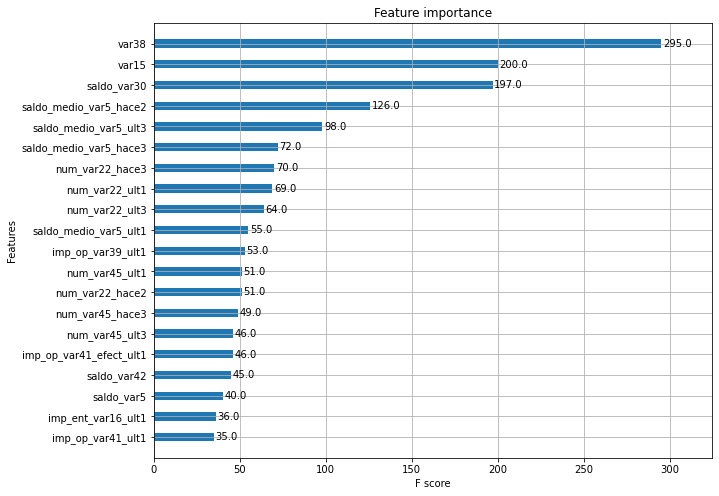

In [15]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

## LightGBM 모델 학습

In [16]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimator=500)

evals=[(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC : {0:.4f}'.format(lgbm_roc_score))

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
[2]	valid_0's auc: 0.818903	valid_0's binary_logloss: 0.160006
[3]	valid_0's auc: 0.827707	valid_0's binary_logloss: 0.156323
[4]	valid_0's auc: 0.832155	valid_0's binary_logloss: 0.153463
[5]	valid_0's auc: 0.834677	valid_0's binary_logloss: 0.151256
[6]	valid_0's auc: 0.834093	valid_0's binary_logloss: 0.149427
[7]	valid_0's auc: 0.837046	valid_0's binary_logloss: 0.147961
[8]	valid_0's auc: 0.837838	valid_0's binary_logloss: 0.146591
[9]	valid_0's auc: 0.839435	valid_0's binary_logloss: 0.145455
[10]	valid_0's auc: 0.83973	valid_0's binary_logloss: 0.144486
[11]	valid_0's auc: 0.839799	valid_0's binary_logloss: 0.143769
[12]	valid_0's auc: 0.840034	valid_0's binary_logloss: 0.143146
[13]	valid_0's auc: 0.840271	valid_0's binary_logloss: 0.142533
[14]	valid_0's auc: 0.840342	valid_0's binary_logloss: 0.142036
[15]	valid_0's auc: 0.840928	valid_0's binary_logloss: 0.14161

### 하이퍼 파라미터 튜닝

In [21]:
# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimator를 200으로 감소
lgbm_clf = LGBMClassifier(n_estimator=201)

params = {'num_leaves':[32,64], 'max_depth':[128,160], 'min_child_samples':[60,100], 'subsample':[0.8,1]}

# 하이퍼 파라미터 테스트의 수행속도를 향상시키기 위해 cv를 지정하지 않습니다.
gridcv = GridSearchCV(lgbm_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X_train, y_train), (X_test,y_test)])

print('GridSearchCV 최적 파라미터', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC : {0:.4f}'.format(lgbm_roc_score))

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.823664	valid_0's binary_logloss: 0.156198	valid_1's auc: 0.821078	valid_1's binary_logloss: 0.16488
[2]	valid_0's auc: 0.82966	valid_0's binary_logloss: 0.150925	valid_1's auc: 0.826326	valid_1's binary_logloss: 0.159774
[3]	valid_0's auc: 0.834498	valid_0's binary_logloss: 0.147158	valid_1's auc: 0.826852	valid_1's binary_logloss: 0.156113
[4]	valid_0's auc: 0.83904	valid_0's binary_logloss: 0.144173	valid_1's auc: 0.831417	valid_1's binary_logloss: 0.153186
[5]	valid_0's auc: 0.841964	valid_0's binary_logloss: 0.141745	valid_1's auc: 0.834593	valid_1's binary_logloss: 0.150797
[6]	valid_0's auc: 0.845253	valid_0's binary_logloss: 0.139712	valid_1's auc: 0.836659	valid_1's binary_logloss: 0.149062
[7]	valid_0's auc: 0.846545	valid_0's binary_logloss: 0.138053	valid_1's auc: 0.836148	valid_1's binary_logloss: 0.147537
[8]	valid_0's auc: 0.848885	valid_0's binary_logloss: 0.1366	valid_1's auc: 0.838153	valid_1's binary_logloss: 0.146268
[9]	valid_0's auc: 0.850839	v

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.821268	valid_0's binary_logloss: 0.156277	valid_1's auc: 0.816814	valid_1's binary_logloss: 0.165016
[2]	valid_0's auc: 0.828863	valid_0's binary_logloss: 0.151005	valid_1's auc: 0.821376	valid_1's binary_logloss: 0.159886
[3]	valid_0's auc: 0.837474	valid_0's binary_logloss: 0.147149	valid_1's auc: 0.828229	valid_1's binary_logloss: 0.156519
[4]	valid_0's auc: 0.842962	valid_0's binary_logloss: 0.144152	valid_1's auc: 0.829952	valid_1's binary_logloss: 0.153687
[5]	valid_0's auc: 0.84635	valid_0's binary_logloss: 0.141643	valid_1's auc: 0.834055	valid_1's binary_logloss: 0.15137
[6]	valid_0's auc: 0.849269	valid_0's binary_logloss: 0.139637	valid_1's auc: 0.834861	valid_1's binary_logloss: 0.149513
[7]	valid_0's auc: 0.851069	valid_0's binary_logloss: 0.137899	valid_1's auc: 0.836696	valid_1's binary_logloss: 0.147828
[8]	valid_0's auc: 0.852425	valid_0's binary_logloss: 0.136444	valid_1's auc: 0.837615	valid_1's

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.825972	valid_0's binary_logloss: 0.15626	valid_1's auc: 0.817426	valid_1's binary_logloss: 0.165002
[2]	valid_0's auc: 0.830735	valid_0's binary_logloss: 0.150869	valid_1's auc: 0.821832	valid_1's binary_logloss: 0.159685
[3]	valid_0's auc: 0.836213	valid_0's binary_logloss: 0.147022	valid_1's auc: 0.825847	valid_1's binary_logloss: 0.156023
[4]	valid_0's auc: 0.839911	valid_0's binary_logloss: 0.143985	valid_1's auc: 0.830159	valid_1's binary_logloss: 0.153298
[5]	valid_0's auc: 0.842712	valid_0's binary_logloss: 0.14152	valid_1's auc: 0.831253	valid_1's binary_logloss: 0.151107
[6]	valid_0's auc: 0.84576	valid_0's binary_logloss: 0.139503	valid_1's auc: 0.835058	valid_1's binary_logloss: 0.149167
[7]	valid_0's auc: 0.84864	valid_0's binary_logloss: 0.137792	valid_1's auc: 0.836612	valid_1's binary_logloss: 0.147629
[8]	valid_0's auc: 0.850006	valid_0's binary_logloss: 0.136329	valid_1's auc: 0.837077	valid_1's b

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.823084	valid_0's binary_logloss: 0.156066	valid_1's auc: 0.821793	valid_1's binary_logloss: 0.164822
[2]	valid_0's auc: 0.827813	valid_0's binary_logloss: 0.150805	valid_1's auc: 0.823891	valid_1's binary_logloss: 0.159732
[3]	valid_0's auc: 0.836023	valid_0's binary_logloss: 0.147035	valid_1's auc: 0.828784	valid_1's binary_logloss: 0.156124
[4]	valid_0's auc: 0.842374	valid_0's binary_logloss: 0.143993	valid_1's auc: 0.832801	valid_1's binary_logloss: 0.153225
[5]	valid_0's auc: 0.845121	valid_0's binary_logloss: 0.141663	valid_1's auc: 0.835734	valid_1's binary_logloss: 0.15098
[6]	valid_0's auc: 0.846404	valid_0's binary_logloss: 0.139689	valid_1's auc: 0.83664	valid_1's binary_logloss: 0.14912
[7]	valid_0's auc: 0.848157	valid_0's binary_logloss: 0.137973	valid_1's auc: 0.836379	valid_1's binary_logloss: 0.147706
[8]	valid_0's auc: 0.84954	valid_0's binary_logloss: 0.136555	valid_1's auc: 0.836889	valid_1's b

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.823422	valid_0's binary_logloss: 0.156446	valid_1's auc: 0.819043	valid_1's binary_logloss: 0.165337
[2]	valid_0's auc: 0.830391	valid_0's binary_logloss: 0.151103	valid_1's auc: 0.82466	valid_1's binary_logloss: 0.160151
[3]	valid_0's auc: 0.836251	valid_0's binary_logloss: 0.14724	valid_1's auc: 0.829717	valid_1's binary_logloss: 0.156452
[4]	valid_0's auc: 0.842516	valid_0's binary_logloss: 0.144162	valid_1's auc: 0.832695	valid_1's binary_logloss: 0.15358
[5]	valid_0's auc: 0.846316	valid_0's binary_logloss: 0.141636	valid_1's auc: 0.834705	valid_1's binary_logloss: 0.151246
[6]	valid_0's auc: 0.847998	valid_0's binary_logloss: 0.139517	valid_1's auc: 0.836546	valid_1's binary_logloss: 0.149374
[7]	valid_0's auc: 0.849074	valid_0's binary_logloss: 0.13782	valid_1's auc: 0.838333	valid_1's binary_logloss: 0.147794
[8]	valid_0's auc: 0.85	valid_0's binary_logloss: 0.136391	valid_1's auc: 0.838986	valid_1's binar

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.823664	valid_0's binary_logloss: 0.156198	valid_1's auc: 0.821078	valid_1's binary_logloss: 0.16488
[2]	valid_0's auc: 0.82966	valid_0's binary_logloss: 0.150925	valid_1's auc: 0.826326	valid_1's binary_logloss: 0.159774
[3]	valid_0's auc: 0.834498	valid_0's binary_logloss: 0.147158	valid_1's auc: 0.826852	valid_1's binary_logloss: 0.156113
[4]	valid_0's auc: 0.83904	valid_0's binary_logloss: 0.144173	valid_1's auc: 0.831417	valid_1's binary_logloss: 0.153186
[5]	valid_0's auc: 0.841964	valid_0's binary_logloss: 0.141745	valid_1's auc: 0.834593	valid_1's binary_logloss: 0.150797
[6]	valid_0's auc: 0.845253	valid_0's binary_logloss: 0.139712	valid_1's auc: 0.836659	valid_1's binary_logloss: 0.149062
[7]	valid_0's auc: 0.846545	valid_0's binary_logloss: 0.138053	valid_1's auc: 0.836148	valid_1's binary_logloss: 0.147537
[8]	valid_0's auc: 0.848885	valid_0's binary_logloss: 0.1366	valid_1's auc: 0.838153	valid_1's bi

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.821268	valid_0's binary_logloss: 0.156277	valid_1's auc: 0.816814	valid_1's binary_logloss: 0.165016
[2]	valid_0's auc: 0.828863	valid_0's binary_logloss: 0.151005	valid_1's auc: 0.821376	valid_1's binary_logloss: 0.159886
[3]	valid_0's auc: 0.837474	valid_0's binary_logloss: 0.147149	valid_1's auc: 0.828229	valid_1's binary_logloss: 0.156519
[4]	valid_0's auc: 0.842962	valid_0's binary_logloss: 0.144152	valid_1's auc: 0.829952	valid_1's binary_logloss: 0.153687
[5]	valid_0's auc: 0.84635	valid_0's binary_logloss: 0.141643	valid_1's auc: 0.834055	valid_1's binary_logloss: 0.15137
[6]	valid_0's auc: 0.849269	valid_0's binary_logloss: 0.139637	valid_1's auc: 0.834861	valid_1's binary_logloss: 0.149513
[7]	valid_0's auc: 0.851069	valid_0's binary_logloss: 0.137899	valid_1's auc: 0.836696	valid_1's binary_logloss: 0.147828
[8]	valid_0's auc: 0.852425	valid_0's binary_logloss: 0.136444	valid_1's auc: 0.837615	valid_1's

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.825972	valid_0's binary_logloss: 0.15626	valid_1's auc: 0.817426	valid_1's binary_logloss: 0.165002
[2]	valid_0's auc: 0.830735	valid_0's binary_logloss: 0.150869	valid_1's auc: 0.821832	valid_1's binary_logloss: 0.159685
[3]	valid_0's auc: 0.836213	valid_0's binary_logloss: 0.147022	valid_1's auc: 0.825847	valid_1's binary_logloss: 0.156023
[4]	valid_0's auc: 0.839911	valid_0's binary_logloss: 0.143985	valid_1's auc: 0.830159	valid_1's binary_logloss: 0.153298
[5]	valid_0's auc: 0.842712	valid_0's binary_logloss: 0.14152	valid_1's auc: 0.831253	valid_1's binary_logloss: 0.151107
[6]	valid_0's auc: 0.84576	valid_0's binary_logloss: 0.139503	valid_1's auc: 0.835058	valid_1's binary_logloss: 0.149167
[7]	valid_0's auc: 0.84864	valid_0's binary_logloss: 0.137792	valid_1's auc: 0.836612	valid_1's binary_logloss: 0.147629
[8]	valid_0's auc: 0.850006	valid_0's binary_logloss: 0.136329	valid_1's auc: 0.837077	valid_1's b

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.823084	valid_0's binary_logloss: 0.156066	valid_1's auc: 0.821793	valid_1's binary_logloss: 0.164822
[2]	valid_0's auc: 0.827813	valid_0's binary_logloss: 0.150805	valid_1's auc: 0.823891	valid_1's binary_logloss: 0.159732
[3]	valid_0's auc: 0.836023	valid_0's binary_logloss: 0.147035	valid_1's auc: 0.828784	valid_1's binary_logloss: 0.156124
[4]	valid_0's auc: 0.842374	valid_0's binary_logloss: 0.143993	valid_1's auc: 0.832801	valid_1's binary_logloss: 0.153225
[5]	valid_0's auc: 0.845121	valid_0's binary_logloss: 0.141663	valid_1's auc: 0.835734	valid_1's binary_logloss: 0.15098
[6]	valid_0's auc: 0.846404	valid_0's binary_logloss: 0.139689	valid_1's auc: 0.83664	valid_1's binary_logloss: 0.14912
[7]	valid_0's auc: 0.848157	valid_0's binary_logloss: 0.137973	valid_1's auc: 0.836379	valid_1's binary_logloss: 0.147706
[8]	valid_0's auc: 0.84954	valid_0's binary_logloss: 0.136555	valid_1's auc: 0.836889	valid_1's b

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.823422	valid_0's binary_logloss: 0.156446	valid_1's auc: 0.819043	valid_1's binary_logloss: 0.165337
[2]	valid_0's auc: 0.830391	valid_0's binary_logloss: 0.151103	valid_1's auc: 0.82466	valid_1's binary_logloss: 0.160151
[3]	valid_0's auc: 0.836251	valid_0's binary_logloss: 0.14724	valid_1's auc: 0.829717	valid_1's binary_logloss: 0.156452
[4]	valid_0's auc: 0.842516	valid_0's binary_logloss: 0.144162	valid_1's auc: 0.832695	valid_1's binary_logloss: 0.15358
[5]	valid_0's auc: 0.846316	valid_0's binary_logloss: 0.141636	valid_1's auc: 0.834705	valid_1's binary_logloss: 0.151246
[6]	valid_0's auc: 0.847998	valid_0's binary_logloss: 0.139517	valid_1's auc: 0.836546	valid_1's binary_logloss: 0.149374
[7]	valid_0's auc: 0.849074	valid_0's binary_logloss: 0.13782	valid_1's auc: 0.838333	valid_1's binary_logloss: 0.147794
[8]	valid_0's auc: 0.85	valid_0's binary_logloss: 0.136391	valid_1's auc: 0.838986	valid_1's binar

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.832025	valid_0's binary_logloss: 0.155465	valid_1's auc: 0.820076	valid_1's binary_logloss: 0.164546
[2]	valid_0's auc: 0.844878	valid_0's binary_logloss: 0.14969	valid_1's auc: 0.828857	valid_1's binary_logloss: 0.159283
[3]	valid_0's auc: 0.848608	valid_0's binary_logloss: 0.145495	valid_1's auc: 0.831668	valid_1's binary_logloss: 0.155726
[4]	valid_0's auc: 0.85412	valid_0's binary_logloss: 0.142244	valid_1's auc: 0.832954	valid_1's binary_logloss: 0.153013
[5]	valid_0's auc: 0.856985	valid_0's binary_logloss: 0.139541	valid_1's auc: 0.834294	valid_1's binary_logloss: 0.150762
[6]	valid_0's auc: 0.860318	valid_0's binary_logloss: 0.137315	valid_1's auc: 0.834439	valid_1's binary_logloss: 0.148891
[7]	valid_0's auc: 0.862354	valid_0's binary_logloss: 0.135314	valid_1's auc: 0.835254	valid_1's binary_logloss: 0.147306
[8]	valid_0's auc: 0.864507	valid_0's binary_logloss: 0.133588	valid_1's auc: 0.834413	valid_1's

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.832082	valid_0's binary_logloss: 0.155469	valid_1's auc: 0.814834	valid_1's binary_logloss: 0.164811
[2]	valid_0's auc: 0.840358	valid_0's binary_logloss: 0.149705	valid_1's auc: 0.821	valid_1's binary_logloss: 0.159739
[3]	valid_0's auc: 0.846958	valid_0's binary_logloss: 0.145462	valid_1's auc: 0.829037	valid_1's binary_logloss: 0.155963
[4]	valid_0's auc: 0.850608	valid_0's binary_logloss: 0.142192	valid_1's auc: 0.830664	valid_1's binary_logloss: 0.153305
[5]	valid_0's auc: 0.857054	valid_0's binary_logloss: 0.139496	valid_1's auc: 0.834255	valid_1's binary_logloss: 0.150999
[6]	valid_0's auc: 0.860917	valid_0's binary_logloss: 0.137183	valid_1's auc: 0.837251	valid_1's binary_logloss: 0.149102
[7]	valid_0's auc: 0.862765	valid_0's binary_logloss: 0.135234	valid_1's auc: 0.838397	valid_1's binary_logloss: 0.14754
[8]	valid_0's auc: 0.865325	valid_0's binary_logloss: 0.133564	valid_1's auc: 0.83904	valid_1's bi

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.833919	valid_0's binary_logloss: 0.155512	valid_1's auc: 0.820637	valid_1's binary_logloss: 0.164643
[2]	valid_0's auc: 0.842002	valid_0's binary_logloss: 0.149635	valid_1's auc: 0.827273	valid_1's binary_logloss: 0.15926
[3]	valid_0's auc: 0.844839	valid_0's binary_logloss: 0.145363	valid_1's auc: 0.829328	valid_1's binary_logloss: 0.155446
[4]	valid_0's auc: 0.851547	valid_0's binary_logloss: 0.142092	valid_1's auc: 0.835576	valid_1's binary_logloss: 0.152516
[5]	valid_0's auc: 0.85629	valid_0's binary_logloss: 0.139314	valid_1's auc: 0.837608	valid_1's binary_logloss: 0.150218
[6]	valid_0's auc: 0.860698	valid_0's binary_logloss: 0.137026	valid_1's auc: 0.837977	valid_1's binary_logloss: 0.148376
[7]	valid_0's auc: 0.863515	valid_0's binary_logloss: 0.135113	valid_1's auc: 0.838443	valid_1's binary_logloss: 0.146922
[8]	valid_0's auc: 0.864625	valid_0's binary_logloss: 0.133401	valid_1's auc: 0.838988	valid_1's

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.830163	valid_0's binary_logloss: 0.155383	valid_1's auc: 0.817444	valid_1's binary_logloss: 0.164924
[2]	valid_0's auc: 0.840688	valid_0's binary_logloss: 0.14972	valid_1's auc: 0.825893	valid_1's binary_logloss: 0.159538
[3]	valid_0's auc: 0.847811	valid_0's binary_logloss: 0.145576	valid_1's auc: 0.832086	valid_1's binary_logloss: 0.155889
[4]	valid_0's auc: 0.85262	valid_0's binary_logloss: 0.142266	valid_1's auc: 0.83348	valid_1's binary_logloss: 0.153059
[5]	valid_0's auc: 0.856853	valid_0's binary_logloss: 0.139575	valid_1's auc: 0.837158	valid_1's binary_logloss: 0.150847
[6]	valid_0's auc: 0.859779	valid_0's binary_logloss: 0.13732	valid_1's auc: 0.839471	valid_1's binary_logloss: 0.148924
[7]	valid_0's auc: 0.861819	valid_0's binary_logloss: 0.135402	valid_1's auc: 0.838324	valid_1's binary_logloss: 0.147505
[8]	valid_0's auc: 0.863714	valid_0's binary_logloss: 0.133757	valid_1's auc: 0.838679	valid_1's b

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.833594	valid_0's binary_logloss: 0.155635	valid_1's auc: 0.820913	valid_1's binary_logloss: 0.165016
[2]	valid_0's auc: 0.846048	valid_0's binary_logloss: 0.149713	valid_1's auc: 0.830646	valid_1's binary_logloss: 0.159607
[3]	valid_0's auc: 0.849539	valid_0's binary_logloss: 0.145369	valid_1's auc: 0.833531	valid_1's binary_logloss: 0.155847
[4]	valid_0's auc: 0.8529	valid_0's binary_logloss: 0.142095	valid_1's auc: 0.832813	valid_1's binary_logloss: 0.15325
[5]	valid_0's auc: 0.855497	valid_0's binary_logloss: 0.13934	valid_1's auc: 0.833555	valid_1's binary_logloss: 0.150958
[6]	valid_0's auc: 0.860603	valid_0's binary_logloss: 0.13707	valid_1's auc: 0.836476	valid_1's binary_logloss: 0.149037
[7]	valid_0's auc: 0.86401	valid_0's binary_logloss: 0.13507	valid_1's auc: 0.838639	valid_1's binary_logloss: 0.147363
[8]	valid_0's auc: 0.866327	valid_0's binary_logloss: 0.133353	valid_1's auc: 0.83917	valid_1's binar

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.832025	valid_0's binary_logloss: 0.155465	valid_1's auc: 0.820076	valid_1's binary_logloss: 0.164546
[2]	valid_0's auc: 0.844878	valid_0's binary_logloss: 0.14969	valid_1's auc: 0.828857	valid_1's binary_logloss: 0.159283
[3]	valid_0's auc: 0.848608	valid_0's binary_logloss: 0.145495	valid_1's auc: 0.831668	valid_1's binary_logloss: 0.155726
[4]	valid_0's auc: 0.85412	valid_0's binary_logloss: 0.142244	valid_1's auc: 0.832954	valid_1's binary_logloss: 0.153013
[5]	valid_0's auc: 0.856985	valid_0's binary_logloss: 0.139541	valid_1's auc: 0.834294	valid_1's binary_logloss: 0.150762
[6]	valid_0's auc: 0.860318	valid_0's binary_logloss: 0.137315	valid_1's auc: 0.834439	valid_1's binary_logloss: 0.148891
[7]	valid_0's auc: 0.862354	valid_0's binary_logloss: 0.135314	valid_1's auc: 0.835254	valid_1's binary_logloss: 0.147306
[8]	valid_0's auc: 0.864507	valid_0's binary_logloss: 0.133588	valid_1's auc: 0.834413	valid_1's

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.832082	valid_0's binary_logloss: 0.155469	valid_1's auc: 0.814834	valid_1's binary_logloss: 0.164811
[2]	valid_0's auc: 0.840358	valid_0's binary_logloss: 0.149705	valid_1's auc: 0.821	valid_1's binary_logloss: 0.159739
[3]	valid_0's auc: 0.846958	valid_0's binary_logloss: 0.145462	valid_1's auc: 0.829037	valid_1's binary_logloss: 0.155963
[4]	valid_0's auc: 0.850608	valid_0's binary_logloss: 0.142192	valid_1's auc: 0.830664	valid_1's binary_logloss: 0.153305
[5]	valid_0's auc: 0.857054	valid_0's binary_logloss: 0.139496	valid_1's auc: 0.834255	valid_1's binary_logloss: 0.150999
[6]	valid_0's auc: 0.860917	valid_0's binary_logloss: 0.137183	valid_1's auc: 0.837251	valid_1's binary_logloss: 0.149102
[7]	valid_0's auc: 0.862765	valid_0's binary_logloss: 0.135234	valid_1's auc: 0.838397	valid_1's binary_logloss: 0.14754
[8]	valid_0's auc: 0.865325	valid_0's binary_logloss: 0.133564	valid_1's auc: 0.83904	valid_1's bi

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.833919	valid_0's binary_logloss: 0.155512	valid_1's auc: 0.820637	valid_1's binary_logloss: 0.164643
[2]	valid_0's auc: 0.842002	valid_0's binary_logloss: 0.149635	valid_1's auc: 0.827273	valid_1's binary_logloss: 0.15926
[3]	valid_0's auc: 0.844839	valid_0's binary_logloss: 0.145363	valid_1's auc: 0.829328	valid_1's binary_logloss: 0.155446
[4]	valid_0's auc: 0.851547	valid_0's binary_logloss: 0.142092	valid_1's auc: 0.835576	valid_1's binary_logloss: 0.152516
[5]	valid_0's auc: 0.85629	valid_0's binary_logloss: 0.139314	valid_1's auc: 0.837608	valid_1's binary_logloss: 0.150218
[6]	valid_0's auc: 0.860698	valid_0's binary_logloss: 0.137026	valid_1's auc: 0.837977	valid_1's binary_logloss: 0.148376
[7]	valid_0's auc: 0.863515	valid_0's binary_logloss: 0.135113	valid_1's auc: 0.838443	valid_1's binary_logloss: 0.146922
[8]	valid_0's auc: 0.864625	valid_0's binary_logloss: 0.133401	valid_1's auc: 0.838988	valid_1's

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.830163	valid_0's binary_logloss: 0.155383	valid_1's auc: 0.817444	valid_1's binary_logloss: 0.164924
[2]	valid_0's auc: 0.840688	valid_0's binary_logloss: 0.14972	valid_1's auc: 0.825893	valid_1's binary_logloss: 0.159538
[3]	valid_0's auc: 0.847811	valid_0's binary_logloss: 0.145576	valid_1's auc: 0.832086	valid_1's binary_logloss: 0.155889
[4]	valid_0's auc: 0.85262	valid_0's binary_logloss: 0.142266	valid_1's auc: 0.83348	valid_1's binary_logloss: 0.153059
[5]	valid_0's auc: 0.856853	valid_0's binary_logloss: 0.139575	valid_1's auc: 0.837158	valid_1's binary_logloss: 0.150847
[6]	valid_0's auc: 0.859779	valid_0's binary_logloss: 0.13732	valid_1's auc: 0.839471	valid_1's binary_logloss: 0.148924
[7]	valid_0's auc: 0.861819	valid_0's binary_logloss: 0.135402	valid_1's auc: 0.838324	valid_1's binary_logloss: 0.147505
[8]	valid_0's auc: 0.863714	valid_0's binary_logloss: 0.133757	valid_1's auc: 0.838679	valid_1's b

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.833594	valid_0's binary_logloss: 0.155635	valid_1's auc: 0.820913	valid_1's binary_logloss: 0.165016
[2]	valid_0's auc: 0.846048	valid_0's binary_logloss: 0.149713	valid_1's auc: 0.830646	valid_1's binary_logloss: 0.159607
[3]	valid_0's auc: 0.849539	valid_0's binary_logloss: 0.145369	valid_1's auc: 0.833531	valid_1's binary_logloss: 0.155847
[4]	valid_0's auc: 0.8529	valid_0's binary_logloss: 0.142095	valid_1's auc: 0.832813	valid_1's binary_logloss: 0.15325
[5]	valid_0's auc: 0.855497	valid_0's binary_logloss: 0.13934	valid_1's auc: 0.833555	valid_1's binary_logloss: 0.150958
[6]	valid_0's auc: 0.860603	valid_0's binary_logloss: 0.13707	valid_1's auc: 0.836476	valid_1's binary_logloss: 0.149037
[7]	valid_0's auc: 0.86401	valid_0's binary_logloss: 0.13507	valid_1's auc: 0.838639	valid_1's binary_logloss: 0.147363
[8]	valid_0's auc: 0.866327	valid_0's binary_logloss: 0.133353	valid_1's auc: 0.83917	valid_1's binar

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.823879	valid_0's binary_logloss: 0.156213	valid_1's auc: 0.821528	valid_1's binary_logloss: 0.16489
[2]	valid_0's auc: 0.829817	valid_0's binary_logloss: 0.151021	valid_1's auc: 0.825621	valid_1's binary_logloss: 0.159697
[3]	valid_0's auc: 0.835232	valid_0's binary_logloss: 0.147177	valid_1's auc: 0.827536	valid_1's binary_logloss: 0.156048
[4]	valid_0's auc: 0.83968	valid_0's binary_logloss: 0.144169	valid_1's auc: 0.829988	valid_1's binary_logloss: 0.15317
[5]	valid_0's auc: 0.842369	valid_0's binary_logloss: 0.141776	valid_1's auc: 0.832821	valid_1's binary_logloss: 0.150835
[6]	valid_0's auc: 0.845358	valid_0's binary_logloss: 0.13981	valid_1's auc: 0.835915	valid_1's binary_logloss: 0.148944
[7]	valid_0's auc: 0.847188	valid_0's binary_logloss: 0.13809	valid_1's auc: 0.836752	valid_1's binary_logloss: 0.147409
[8]	valid_0's auc: 0.850075	valid_0's binary_logloss: 0.136655	valid_1's auc: 0.838523	valid_1's bi

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.822096	valid_0's binary_logloss: 0.15642	valid_1's auc: 0.814231	valid_1's binary_logloss: 0.165423
[2]	valid_0's auc: 0.830899	valid_0's binary_logloss: 0.151112	valid_1's auc: 0.821277	valid_1's binary_logloss: 0.160161
[3]	valid_0's auc: 0.83949	valid_0's binary_logloss: 0.147196	valid_1's auc: 0.828421	valid_1's binary_logloss: 0.156499
[4]	valid_0's auc: 0.84292	valid_0's binary_logloss: 0.14418	valid_1's auc: 0.831515	valid_1's binary_logloss: 0.153682
[5]	valid_0's auc: 0.846745	valid_0's binary_logloss: 0.141793	valid_1's auc: 0.836391	valid_1's binary_logloss: 0.151366
[6]	valid_0's auc: 0.849204	valid_0's binary_logloss: 0.139816	valid_1's auc: 0.838385	valid_1's binary_logloss: 0.149412
[7]	valid_0's auc: 0.850163	valid_0's binary_logloss: 0.138129	valid_1's auc: 0.838637	valid_1's binary_logloss: 0.147877
[8]	valid_0's auc: 0.852051	valid_0's binary_logloss: 0.136672	valid_1's auc: 0.838308	valid_1's b

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.826319	valid_0's binary_logloss: 0.156309	valid_1's auc: 0.814027	valid_1's binary_logloss: 0.16516
[2]	valid_0's auc: 0.832276	valid_0's binary_logloss: 0.151075	valid_1's auc: 0.819879	valid_1's binary_logloss: 0.160057
[3]	valid_0's auc: 0.836968	valid_0's binary_logloss: 0.147259	valid_1's auc: 0.825144	valid_1's binary_logloss: 0.156367
[4]	valid_0's auc: 0.840937	valid_0's binary_logloss: 0.144237	valid_1's auc: 0.830372	valid_1's binary_logloss: 0.153364
[5]	valid_0's auc: 0.845178	valid_0's binary_logloss: 0.141851	valid_1's auc: 0.835122	valid_1's binary_logloss: 0.151017
[6]	valid_0's auc: 0.846202	valid_0's binary_logloss: 0.139881	valid_1's auc: 0.835139	valid_1's binary_logloss: 0.149202
[7]	valid_0's auc: 0.849501	valid_0's binary_logloss: 0.13816	valid_1's auc: 0.838439	valid_1's binary_logloss: 0.147646
[8]	valid_0's auc: 0.850898	valid_0's binary_logloss: 0.136639	valid_1's auc: 0.838862	valid_1's

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.823467	valid_0's binary_logloss: 0.156234	valid_1's auc: 0.818359	valid_1's binary_logloss: 0.165045
[2]	valid_0's auc: 0.831432	valid_0's binary_logloss: 0.151096	valid_1's auc: 0.822806	valid_1's binary_logloss: 0.160035
[3]	valid_0's auc: 0.837942	valid_0's binary_logloss: 0.147265	valid_1's auc: 0.827733	valid_1's binary_logloss: 0.156278
[4]	valid_0's auc: 0.842228	valid_0's binary_logloss: 0.144266	valid_1's auc: 0.833199	valid_1's binary_logloss: 0.153439
[5]	valid_0's auc: 0.845913	valid_0's binary_logloss: 0.141908	valid_1's auc: 0.836078	valid_1's binary_logloss: 0.151112
[6]	valid_0's auc: 0.847301	valid_0's binary_logloss: 0.139924	valid_1's auc: 0.837962	valid_1's binary_logloss: 0.149212
[7]	valid_0's auc: 0.848494	valid_0's binary_logloss: 0.138267	valid_1's auc: 0.837664	valid_1's binary_logloss: 0.147687
[8]	valid_0's auc: 0.849608	valid_0's binary_logloss: 0.136839	valid_1's auc: 0.839054	valid_1

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.822477	valid_0's binary_logloss: 0.156615	valid_1's auc: 0.818936	valid_1's binary_logloss: 0.16507
[2]	valid_0's auc: 0.829931	valid_0's binary_logloss: 0.151227	valid_1's auc: 0.824213	valid_1's binary_logloss: 0.159973
[3]	valid_0's auc: 0.835788	valid_0's binary_logloss: 0.147372	valid_1's auc: 0.829555	valid_1's binary_logloss: 0.156407
[4]	valid_0's auc: 0.842398	valid_0's binary_logloss: 0.14436	valid_1's auc: 0.833204	valid_1's binary_logloss: 0.153426
[5]	valid_0's auc: 0.84472	valid_0's binary_logloss: 0.141969	valid_1's auc: 0.835438	valid_1's binary_logloss: 0.15118
[6]	valid_0's auc: 0.846873	valid_0's binary_logloss: 0.13984	valid_1's auc: 0.836808	valid_1's binary_logloss: 0.149232
[7]	valid_0's auc: 0.849397	valid_0's binary_logloss: 0.138081	valid_1's auc: 0.838165	valid_1's binary_logloss: 0.147687
[8]	valid_0's auc: 0.850636	valid_0's binary_logloss: 0.136651	valid_1's auc: 0.839203	valid_1's bi

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.823879	valid_0's binary_logloss: 0.156213	valid_1's auc: 0.821528	valid_1's binary_logloss: 0.16489
[2]	valid_0's auc: 0.829817	valid_0's binary_logloss: 0.151021	valid_1's auc: 0.825621	valid_1's binary_logloss: 0.159697
[3]	valid_0's auc: 0.835232	valid_0's binary_logloss: 0.147177	valid_1's auc: 0.827536	valid_1's binary_logloss: 0.156048
[4]	valid_0's auc: 0.83968	valid_0's binary_logloss: 0.144169	valid_1's auc: 0.829988	valid_1's binary_logloss: 0.15317
[5]	valid_0's auc: 0.842369	valid_0's binary_logloss: 0.141776	valid_1's auc: 0.832821	valid_1's binary_logloss: 0.150835
[6]	valid_0's auc: 0.845358	valid_0's binary_logloss: 0.13981	valid_1's auc: 0.835915	valid_1's binary_logloss: 0.148944
[7]	valid_0's auc: 0.847188	valid_0's binary_logloss: 0.13809	valid_1's auc: 0.836752	valid_1's binary_logloss: 0.147409
[8]	valid_0's auc: 0.850075	valid_0's binary_logloss: 0.136655	valid_1's auc: 0.838523	valid_1's bi

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.822096	valid_0's binary_logloss: 0.15642	valid_1's auc: 0.814231	valid_1's binary_logloss: 0.165423
[2]	valid_0's auc: 0.830899	valid_0's binary_logloss: 0.151112	valid_1's auc: 0.821277	valid_1's binary_logloss: 0.160161
[3]	valid_0's auc: 0.83949	valid_0's binary_logloss: 0.147196	valid_1's auc: 0.828421	valid_1's binary_logloss: 0.156499
[4]	valid_0's auc: 0.84292	valid_0's binary_logloss: 0.14418	valid_1's auc: 0.831515	valid_1's binary_logloss: 0.153682
[5]	valid_0's auc: 0.846745	valid_0's binary_logloss: 0.141793	valid_1's auc: 0.836391	valid_1's binary_logloss: 0.151366
[6]	valid_0's auc: 0.849204	valid_0's binary_logloss: 0.139816	valid_1's auc: 0.838385	valid_1's binary_logloss: 0.149412
[7]	valid_0's auc: 0.850163	valid_0's binary_logloss: 0.138129	valid_1's auc: 0.838637	valid_1's binary_logloss: 0.147877
[8]	valid_0's auc: 0.852051	valid_0's binary_logloss: 0.136672	valid_1's auc: 0.838308	valid_1's b

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.826319	valid_0's binary_logloss: 0.156309	valid_1's auc: 0.814027	valid_1's binary_logloss: 0.16516
[2]	valid_0's auc: 0.832276	valid_0's binary_logloss: 0.151075	valid_1's auc: 0.819879	valid_1's binary_logloss: 0.160057
[3]	valid_0's auc: 0.836968	valid_0's binary_logloss: 0.147259	valid_1's auc: 0.825144	valid_1's binary_logloss: 0.156367
[4]	valid_0's auc: 0.840937	valid_0's binary_logloss: 0.144237	valid_1's auc: 0.830372	valid_1's binary_logloss: 0.153364
[5]	valid_0's auc: 0.845178	valid_0's binary_logloss: 0.141851	valid_1's auc: 0.835122	valid_1's binary_logloss: 0.151017
[6]	valid_0's auc: 0.846202	valid_0's binary_logloss: 0.139881	valid_1's auc: 0.835139	valid_1's binary_logloss: 0.149202
[7]	valid_0's auc: 0.849501	valid_0's binary_logloss: 0.13816	valid_1's auc: 0.838439	valid_1's binary_logloss: 0.147646
[8]	valid_0's auc: 0.850898	valid_0's binary_logloss: 0.136639	valid_1's auc: 0.838862	valid_1's

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.823467	valid_0's binary_logloss: 0.156234	valid_1's auc: 0.818359	valid_1's binary_logloss: 0.165045
[2]	valid_0's auc: 0.831432	valid_0's binary_logloss: 0.151096	valid_1's auc: 0.822806	valid_1's binary_logloss: 0.160035
[3]	valid_0's auc: 0.837942	valid_0's binary_logloss: 0.147265	valid_1's auc: 0.827733	valid_1's binary_logloss: 0.156278
[4]	valid_0's auc: 0.842228	valid_0's binary_logloss: 0.144266	valid_1's auc: 0.833199	valid_1's binary_logloss: 0.153439
[5]	valid_0's auc: 0.845913	valid_0's binary_logloss: 0.141908	valid_1's auc: 0.836078	valid_1's binary_logloss: 0.151112
[6]	valid_0's auc: 0.847301	valid_0's binary_logloss: 0.139924	valid_1's auc: 0.837962	valid_1's binary_logloss: 0.149212
[7]	valid_0's auc: 0.848494	valid_0's binary_logloss: 0.138267	valid_1's auc: 0.837664	valid_1's binary_logloss: 0.147687
[8]	valid_0's auc: 0.849608	valid_0's binary_logloss: 0.136839	valid_1's auc: 0.839054	valid_1

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.822477	valid_0's binary_logloss: 0.156615	valid_1's auc: 0.818936	valid_1's binary_logloss: 0.16507
[2]	valid_0's auc: 0.829931	valid_0's binary_logloss: 0.151227	valid_1's auc: 0.824213	valid_1's binary_logloss: 0.159973
[3]	valid_0's auc: 0.835788	valid_0's binary_logloss: 0.147372	valid_1's auc: 0.829555	valid_1's binary_logloss: 0.156407
[4]	valid_0's auc: 0.842398	valid_0's binary_logloss: 0.14436	valid_1's auc: 0.833204	valid_1's binary_logloss: 0.153426
[5]	valid_0's auc: 0.84472	valid_0's binary_logloss: 0.141969	valid_1's auc: 0.835438	valid_1's binary_logloss: 0.15118
[6]	valid_0's auc: 0.846873	valid_0's binary_logloss: 0.13984	valid_1's auc: 0.836808	valid_1's binary_logloss: 0.149232
[7]	valid_0's auc: 0.849397	valid_0's binary_logloss: 0.138081	valid_1's auc: 0.838165	valid_1's binary_logloss: 0.147687
[8]	valid_0's auc: 0.850636	valid_0's binary_logloss: 0.136651	valid_1's auc: 0.839203	valid_1's bi

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.833136	valid_0's binary_logloss: 0.155618	valid_1's auc: 0.823516	valid_1's binary_logloss: 0.164757
[2]	valid_0's auc: 0.842036	valid_0's binary_logloss: 0.149972	valid_1's auc: 0.826285	valid_1's binary_logloss: 0.159717
[3]	valid_0's auc: 0.847172	valid_0's binary_logloss: 0.145999	valid_1's auc: 0.830898	valid_1's binary_logloss: 0.156155
[4]	valid_0's auc: 0.854159	valid_0's binary_logloss: 0.142767	valid_1's auc: 0.834809	valid_1's binary_logloss: 0.153226
[5]	valid_0's auc: 0.857704	valid_0's binary_logloss: 0.140143	valid_1's auc: 0.836643	valid_1's binary_logloss: 0.15094
[6]	valid_0's auc: 0.860316	valid_0's binary_logloss: 0.137951	valid_1's auc: 0.836175	valid_1's binary_logloss: 0.149162
[7]	valid_0's auc: 0.862439	valid_0's binary_logloss: 0.136077	valid_1's auc: 0.835532	valid_1's binary_logloss: 0.147649
[8]	valid_0's auc: 0.864272	valid_0's binary_logloss: 0.134388	valid_1's auc: 0.83563	valid_1's

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.833297	valid_0's binary_logloss: 0.155798	valid_1's auc: 0.814648	valid_1's binary_logloss: 0.165178
[2]	valid_0's auc: 0.84496	valid_0's binary_logloss: 0.150106	valid_1's auc: 0.825101	valid_1's binary_logloss: 0.159672
[3]	valid_0's auc: 0.848339	valid_0's binary_logloss: 0.145999	valid_1's auc: 0.829756	valid_1's binary_logloss: 0.156122
[4]	valid_0's auc: 0.852327	valid_0's binary_logloss: 0.142785	valid_1's auc: 0.83262	valid_1's binary_logloss: 0.153215
[5]	valid_0's auc: 0.856991	valid_0's binary_logloss: 0.140075	valid_1's auc: 0.83528	valid_1's binary_logloss: 0.150936
[6]	valid_0's auc: 0.860123	valid_0's binary_logloss: 0.13786	valid_1's auc: 0.837776	valid_1's binary_logloss: 0.149015
[7]	valid_0's auc: 0.862074	valid_0's binary_logloss: 0.135927	valid_1's auc: 0.837932	valid_1's binary_logloss: 0.147666
[8]	valid_0's auc: 0.863556	valid_0's binary_logloss: 0.134329	valid_1's auc: 0.837522	valid_1's b

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.834438	valid_0's binary_logloss: 0.155707	valid_1's auc: 0.821419	valid_1's binary_logloss: 0.164715
[2]	valid_0's auc: 0.845934	valid_0's binary_logloss: 0.150048	valid_1's auc: 0.831027	valid_1's binary_logloss: 0.159506
[3]	valid_0's auc: 0.849836	valid_0's binary_logloss: 0.145927	valid_1's auc: 0.831719	valid_1's binary_logloss: 0.155735
[4]	valid_0's auc: 0.854642	valid_0's binary_logloss: 0.142686	valid_1's auc: 0.835345	valid_1's binary_logloss: 0.152919
[5]	valid_0's auc: 0.856628	valid_0's binary_logloss: 0.139976	valid_1's auc: 0.83701	valid_1's binary_logloss: 0.15048
[6]	valid_0's auc: 0.859766	valid_0's binary_logloss: 0.137707	valid_1's auc: 0.83737	valid_1's binary_logloss: 0.148709
[7]	valid_0's auc: 0.861667	valid_0's binary_logloss: 0.13588	valid_1's auc: 0.837028	valid_1's binary_logloss: 0.147239
[8]	valid_0's auc: 0.863565	valid_0's binary_logloss: 0.134173	valid_1's auc: 0.838026	valid_1's b

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.831709	valid_0's binary_logloss: 0.155602	valid_1's auc: 0.817142	valid_1's binary_logloss: 0.164826
[2]	valid_0's auc: 0.845013	valid_0's binary_logloss: 0.15006	valid_1's auc: 0.83132	valid_1's binary_logloss: 0.159674
[3]	valid_0's auc: 0.847843	valid_0's binary_logloss: 0.145936	valid_1's auc: 0.833351	valid_1's binary_logloss: 0.155788
[4]	valid_0's auc: 0.853126	valid_0's binary_logloss: 0.142751	valid_1's auc: 0.836086	valid_1's binary_logloss: 0.152883
[5]	valid_0's auc: 0.855373	valid_0's binary_logloss: 0.140124	valid_1's auc: 0.836802	valid_1's binary_logloss: 0.150648
[6]	valid_0's auc: 0.858982	valid_0's binary_logloss: 0.137929	valid_1's auc: 0.837196	valid_1's binary_logloss: 0.148838
[7]	valid_0's auc: 0.860432	valid_0's binary_logloss: 0.136116	valid_1's auc: 0.8365	valid_1's binary_logloss: 0.147355
[8]	valid_0's auc: 0.86237	valid_0's binary_logloss: 0.134493	valid_1's auc: 0.836708	valid_1's bi

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.832354	valid_0's binary_logloss: 0.156011	valid_1's auc: 0.824432	valid_1's binary_logloss: 0.164746
[2]	valid_0's auc: 0.845573	valid_0's binary_logloss: 0.150188	valid_1's auc: 0.832252	valid_1's binary_logloss: 0.159476
[3]	valid_0's auc: 0.848609	valid_0's binary_logloss: 0.145958	valid_1's auc: 0.834138	valid_1's binary_logloss: 0.155738
[4]	valid_0's auc: 0.851924	valid_0's binary_logloss: 0.142678	valid_1's auc: 0.834388	valid_1's binary_logloss: 0.152853
[5]	valid_0's auc: 0.854459	valid_0's binary_logloss: 0.140096	valid_1's auc: 0.834654	valid_1's binary_logloss: 0.150614
[6]	valid_0's auc: 0.860195	valid_0's binary_logloss: 0.137818	valid_1's auc: 0.837402	valid_1's binary_logloss: 0.148623
[7]	valid_0's auc: 0.861877	valid_0's binary_logloss: 0.135948	valid_1's auc: 0.837505	valid_1's binary_logloss: 0.14706
[8]	valid_0's auc: 0.863997	valid_0's binary_logloss: 0.134369	valid_1's auc: 0.837955	valid_1'

[68]	valid_0's auc: 0.918757	valid_0's binary_logloss: 0.105956	valid_1's auc: 0.8357	valid_1's binary_logloss: 0.140696
[69]	valid_0's auc: 0.919319	valid_0's binary_logloss: 0.105704	valid_1's auc: 0.83538	valid_1's binary_logloss: 0.140788
[70]	valid_0's auc: 0.919498	valid_0's binary_logloss: 0.105505	valid_1's auc: 0.834956	valid_1's binary_logloss: 0.140912
[71]	valid_0's auc: 0.919774	valid_0's binary_logloss: 0.105296	valid_1's auc: 0.834571	valid_1's binary_logloss: 0.141016


C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.833136	valid_0's binary_logloss: 0.155618	valid_1's auc: 0.823516	valid_1's binary_logloss: 0.164757
[2]	valid_0's auc: 0.842036	valid_0's binary_logloss: 0.149972	valid_1's auc: 0.826285	valid_1's binary_logloss: 0.159717
[3]	valid_0's auc: 0.847172	valid_0's binary_logloss: 0.145999	valid_1's auc: 0.830898	valid_1's binary_logloss: 0.156155
[4]	valid_0's auc: 0.854159	valid_0's binary_logloss: 0.142767	valid_1's auc: 0.834809	valid_1's binary_logloss: 0.153226
[5]	valid_0's auc: 0.857704	valid_0's binary_logloss: 0.140143	valid_1's auc: 0.836643	valid_1's binary_logloss: 0.15094
[6]	valid_0's auc: 0.860316	valid_0's binary_logloss: 0.137951	valid_1's auc: 0.836175	valid_1's binary_logloss: 0.149162
[7]	valid_0's auc: 0.862439	valid_0's binary_logloss: 0.136077	valid_1's auc: 0.835532	valid_1's binary_logloss: 0.147649
[8]	valid_0's auc: 0.864272	valid_0's binary_logloss: 0.134388	valid_1's auc: 0.83563	valid_1's

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.833297	valid_0's binary_logloss: 0.155798	valid_1's auc: 0.814648	valid_1's binary_logloss: 0.165178
[2]	valid_0's auc: 0.84496	valid_0's binary_logloss: 0.150106	valid_1's auc: 0.825101	valid_1's binary_logloss: 0.159672
[3]	valid_0's auc: 0.848339	valid_0's binary_logloss: 0.145999	valid_1's auc: 0.829756	valid_1's binary_logloss: 0.156122
[4]	valid_0's auc: 0.852327	valid_0's binary_logloss: 0.142785	valid_1's auc: 0.83262	valid_1's binary_logloss: 0.153215
[5]	valid_0's auc: 0.856991	valid_0's binary_logloss: 0.140075	valid_1's auc: 0.83528	valid_1's binary_logloss: 0.150936
[6]	valid_0's auc: 0.860123	valid_0's binary_logloss: 0.13786	valid_1's auc: 0.837776	valid_1's binary_logloss: 0.149015
[7]	valid_0's auc: 0.862074	valid_0's binary_logloss: 0.135927	valid_1's auc: 0.837932	valid_1's binary_logloss: 0.147666
[8]	valid_0's auc: 0.863556	valid_0's binary_logloss: 0.134329	valid_1's auc: 0.837522	valid_1's b

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.834438	valid_0's binary_logloss: 0.155707	valid_1's auc: 0.821419	valid_1's binary_logloss: 0.164715
[2]	valid_0's auc: 0.845934	valid_0's binary_logloss: 0.150048	valid_1's auc: 0.831027	valid_1's binary_logloss: 0.159506
[3]	valid_0's auc: 0.849836	valid_0's binary_logloss: 0.145927	valid_1's auc: 0.831719	valid_1's binary_logloss: 0.155735
[4]	valid_0's auc: 0.854642	valid_0's binary_logloss: 0.142686	valid_1's auc: 0.835345	valid_1's binary_logloss: 0.152919
[5]	valid_0's auc: 0.856628	valid_0's binary_logloss: 0.139976	valid_1's auc: 0.83701	valid_1's binary_logloss: 0.15048
[6]	valid_0's auc: 0.859766	valid_0's binary_logloss: 0.137707	valid_1's auc: 0.83737	valid_1's binary_logloss: 0.148709
[7]	valid_0's auc: 0.861667	valid_0's binary_logloss: 0.13588	valid_1's auc: 0.837028	valid_1's binary_logloss: 0.147239
[8]	valid_0's auc: 0.863565	valid_0's binary_logloss: 0.134173	valid_1's auc: 0.838026	valid_1's b

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.831709	valid_0's binary_logloss: 0.155602	valid_1's auc: 0.817142	valid_1's binary_logloss: 0.164826
[2]	valid_0's auc: 0.845013	valid_0's binary_logloss: 0.15006	valid_1's auc: 0.83132	valid_1's binary_logloss: 0.159674
[3]	valid_0's auc: 0.847843	valid_0's binary_logloss: 0.145936	valid_1's auc: 0.833351	valid_1's binary_logloss: 0.155788
[4]	valid_0's auc: 0.853126	valid_0's binary_logloss: 0.142751	valid_1's auc: 0.836086	valid_1's binary_logloss: 0.152883
[5]	valid_0's auc: 0.855373	valid_0's binary_logloss: 0.140124	valid_1's auc: 0.836802	valid_1's binary_logloss: 0.150648
[6]	valid_0's auc: 0.858982	valid_0's binary_logloss: 0.137929	valid_1's auc: 0.837196	valid_1's binary_logloss: 0.148838
[7]	valid_0's auc: 0.860432	valid_0's binary_logloss: 0.136116	valid_1's auc: 0.8365	valid_1's binary_logloss: 0.147355
[8]	valid_0's auc: 0.86237	valid_0's binary_logloss: 0.134493	valid_1's auc: 0.836708	valid_1's bi

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.832354	valid_0's binary_logloss: 0.156011	valid_1's auc: 0.824432	valid_1's binary_logloss: 0.164746
[2]	valid_0's auc: 0.845573	valid_0's binary_logloss: 0.150188	valid_1's auc: 0.832252	valid_1's binary_logloss: 0.159476
[3]	valid_0's auc: 0.848609	valid_0's binary_logloss: 0.145958	valid_1's auc: 0.834138	valid_1's binary_logloss: 0.155738
[4]	valid_0's auc: 0.851924	valid_0's binary_logloss: 0.142678	valid_1's auc: 0.834388	valid_1's binary_logloss: 0.152853
[5]	valid_0's auc: 0.854459	valid_0's binary_logloss: 0.140096	valid_1's auc: 0.834654	valid_1's binary_logloss: 0.150614
[6]	valid_0's auc: 0.860195	valid_0's binary_logloss: 0.137818	valid_1's auc: 0.837402	valid_1's binary_logloss: 0.148623
[7]	valid_0's auc: 0.861877	valid_0's binary_logloss: 0.135948	valid_1's auc: 0.837505	valid_1's binary_logloss: 0.14706
[8]	valid_0's auc: 0.863997	valid_0's binary_logloss: 0.134369	valid_1's auc: 0.837955	valid_1'

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.823664	valid_0's binary_logloss: 0.156198	valid_1's auc: 0.821078	valid_1's binary_logloss: 0.16488
[2]	valid_0's auc: 0.82966	valid_0's binary_logloss: 0.150925	valid_1's auc: 0.826326	valid_1's binary_logloss: 0.159774
[3]	valid_0's auc: 0.834498	valid_0's binary_logloss: 0.147158	valid_1's auc: 0.826852	valid_1's binary_logloss: 0.156113
[4]	valid_0's auc: 0.83904	valid_0's binary_logloss: 0.144173	valid_1's auc: 0.831417	valid_1's binary_logloss: 0.153186
[5]	valid_0's auc: 0.841964	valid_0's binary_logloss: 0.141745	valid_1's auc: 0.834593	valid_1's binary_logloss: 0.150797
[6]	valid_0's auc: 0.845253	valid_0's binary_logloss: 0.139712	valid_1's auc: 0.836659	valid_1's binary_logloss: 0.149062
[7]	valid_0's auc: 0.846545	valid_0's binary_logloss: 0.138053	valid_1's auc: 0.836148	valid_1's binary_logloss: 0.147537
[8]	valid_0's auc: 0.848885	valid_0's binary_logloss: 0.1366	valid_1's auc: 0.838153	valid_1's bi

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.821268	valid_0's binary_logloss: 0.156277	valid_1's auc: 0.816814	valid_1's binary_logloss: 0.165016
[2]	valid_0's auc: 0.828863	valid_0's binary_logloss: 0.151005	valid_1's auc: 0.821376	valid_1's binary_logloss: 0.159886
[3]	valid_0's auc: 0.837474	valid_0's binary_logloss: 0.147149	valid_1's auc: 0.828229	valid_1's binary_logloss: 0.156519
[4]	valid_0's auc: 0.842962	valid_0's binary_logloss: 0.144152	valid_1's auc: 0.829952	valid_1's binary_logloss: 0.153687
[5]	valid_0's auc: 0.84635	valid_0's binary_logloss: 0.141643	valid_1's auc: 0.834055	valid_1's binary_logloss: 0.15137
[6]	valid_0's auc: 0.849269	valid_0's binary_logloss: 0.139637	valid_1's auc: 0.834861	valid_1's binary_logloss: 0.149513
[7]	valid_0's auc: 0.851069	valid_0's binary_logloss: 0.137899	valid_1's auc: 0.836696	valid_1's binary_logloss: 0.147828
[8]	valid_0's auc: 0.852425	valid_0's binary_logloss: 0.136444	valid_1's auc: 0.837615	valid_1's

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.825972	valid_0's binary_logloss: 0.15626	valid_1's auc: 0.817426	valid_1's binary_logloss: 0.165002
[2]	valid_0's auc: 0.830735	valid_0's binary_logloss: 0.150869	valid_1's auc: 0.821832	valid_1's binary_logloss: 0.159685
[3]	valid_0's auc: 0.836213	valid_0's binary_logloss: 0.147022	valid_1's auc: 0.825847	valid_1's binary_logloss: 0.156023
[4]	valid_0's auc: 0.839911	valid_0's binary_logloss: 0.143985	valid_1's auc: 0.830159	valid_1's binary_logloss: 0.153298
[5]	valid_0's auc: 0.842712	valid_0's binary_logloss: 0.14152	valid_1's auc: 0.831253	valid_1's binary_logloss: 0.151107
[6]	valid_0's auc: 0.84576	valid_0's binary_logloss: 0.139503	valid_1's auc: 0.835058	valid_1's binary_logloss: 0.149167
[7]	valid_0's auc: 0.84864	valid_0's binary_logloss: 0.137792	valid_1's auc: 0.836612	valid_1's binary_logloss: 0.147629
[8]	valid_0's auc: 0.850006	valid_0's binary_logloss: 0.136329	valid_1's auc: 0.837077	valid_1's b

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.823084	valid_0's binary_logloss: 0.156066	valid_1's auc: 0.821793	valid_1's binary_logloss: 0.164822
[2]	valid_0's auc: 0.827813	valid_0's binary_logloss: 0.150805	valid_1's auc: 0.823891	valid_1's binary_logloss: 0.159732
[3]	valid_0's auc: 0.836023	valid_0's binary_logloss: 0.147035	valid_1's auc: 0.828784	valid_1's binary_logloss: 0.156124
[4]	valid_0's auc: 0.842374	valid_0's binary_logloss: 0.143993	valid_1's auc: 0.832801	valid_1's binary_logloss: 0.153225
[5]	valid_0's auc: 0.845121	valid_0's binary_logloss: 0.141663	valid_1's auc: 0.835734	valid_1's binary_logloss: 0.15098
[6]	valid_0's auc: 0.846404	valid_0's binary_logloss: 0.139689	valid_1's auc: 0.83664	valid_1's binary_logloss: 0.14912
[7]	valid_0's auc: 0.848157	valid_0's binary_logloss: 0.137973	valid_1's auc: 0.836379	valid_1's binary_logloss: 0.147706
[8]	valid_0's auc: 0.84954	valid_0's binary_logloss: 0.136555	valid_1's auc: 0.836889	valid_1's b

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.823422	valid_0's binary_logloss: 0.156446	valid_1's auc: 0.819043	valid_1's binary_logloss: 0.165337
[2]	valid_0's auc: 0.830391	valid_0's binary_logloss: 0.151103	valid_1's auc: 0.82466	valid_1's binary_logloss: 0.160151
[3]	valid_0's auc: 0.836251	valid_0's binary_logloss: 0.14724	valid_1's auc: 0.829717	valid_1's binary_logloss: 0.156452
[4]	valid_0's auc: 0.842516	valid_0's binary_logloss: 0.144162	valid_1's auc: 0.832695	valid_1's binary_logloss: 0.15358
[5]	valid_0's auc: 0.846316	valid_0's binary_logloss: 0.141636	valid_1's auc: 0.834705	valid_1's binary_logloss: 0.151246
[6]	valid_0's auc: 0.847998	valid_0's binary_logloss: 0.139517	valid_1's auc: 0.836546	valid_1's binary_logloss: 0.149374
[7]	valid_0's auc: 0.849074	valid_0's binary_logloss: 0.13782	valid_1's auc: 0.838333	valid_1's binary_logloss: 0.147794
[8]	valid_0's auc: 0.85	valid_0's binary_logloss: 0.136391	valid_1's auc: 0.838986	valid_1's binar

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.823664	valid_0's binary_logloss: 0.156198	valid_1's auc: 0.821078	valid_1's binary_logloss: 0.16488
[2]	valid_0's auc: 0.82966	valid_0's binary_logloss: 0.150925	valid_1's auc: 0.826326	valid_1's binary_logloss: 0.159774
[3]	valid_0's auc: 0.834498	valid_0's binary_logloss: 0.147158	valid_1's auc: 0.826852	valid_1's binary_logloss: 0.156113
[4]	valid_0's auc: 0.83904	valid_0's binary_logloss: 0.144173	valid_1's auc: 0.831417	valid_1's binary_logloss: 0.153186
[5]	valid_0's auc: 0.841964	valid_0's binary_logloss: 0.141745	valid_1's auc: 0.834593	valid_1's binary_logloss: 0.150797
[6]	valid_0's auc: 0.845253	valid_0's binary_logloss: 0.139712	valid_1's auc: 0.836659	valid_1's binary_logloss: 0.149062
[7]	valid_0's auc: 0.846545	valid_0's binary_logloss: 0.138053	valid_1's auc: 0.836148	valid_1's binary_logloss: 0.147537
[8]	valid_0's auc: 0.848885	valid_0's binary_logloss: 0.1366	valid_1's auc: 0.838153	valid_1's bi

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.821268	valid_0's binary_logloss: 0.156277	valid_1's auc: 0.816814	valid_1's binary_logloss: 0.165016
[2]	valid_0's auc: 0.828863	valid_0's binary_logloss: 0.151005	valid_1's auc: 0.821376	valid_1's binary_logloss: 0.159886
[3]	valid_0's auc: 0.837474	valid_0's binary_logloss: 0.147149	valid_1's auc: 0.828229	valid_1's binary_logloss: 0.156519
[4]	valid_0's auc: 0.842962	valid_0's binary_logloss: 0.144152	valid_1's auc: 0.829952	valid_1's binary_logloss: 0.153687
[5]	valid_0's auc: 0.84635	valid_0's binary_logloss: 0.141643	valid_1's auc: 0.834055	valid_1's binary_logloss: 0.15137
[6]	valid_0's auc: 0.849269	valid_0's binary_logloss: 0.139637	valid_1's auc: 0.834861	valid_1's binary_logloss: 0.149513
[7]	valid_0's auc: 0.851069	valid_0's binary_logloss: 0.137899	valid_1's auc: 0.836696	valid_1's binary_logloss: 0.147828
[8]	valid_0's auc: 0.852425	valid_0's binary_logloss: 0.136444	valid_1's auc: 0.837615	valid_1's

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.825972	valid_0's binary_logloss: 0.15626	valid_1's auc: 0.817426	valid_1's binary_logloss: 0.165002
[2]	valid_0's auc: 0.830735	valid_0's binary_logloss: 0.150869	valid_1's auc: 0.821832	valid_1's binary_logloss: 0.159685
[3]	valid_0's auc: 0.836213	valid_0's binary_logloss: 0.147022	valid_1's auc: 0.825847	valid_1's binary_logloss: 0.156023
[4]	valid_0's auc: 0.839911	valid_0's binary_logloss: 0.143985	valid_1's auc: 0.830159	valid_1's binary_logloss: 0.153298
[5]	valid_0's auc: 0.842712	valid_0's binary_logloss: 0.14152	valid_1's auc: 0.831253	valid_1's binary_logloss: 0.151107
[6]	valid_0's auc: 0.84576	valid_0's binary_logloss: 0.139503	valid_1's auc: 0.835058	valid_1's binary_logloss: 0.149167
[7]	valid_0's auc: 0.84864	valid_0's binary_logloss: 0.137792	valid_1's auc: 0.836612	valid_1's binary_logloss: 0.147629
[8]	valid_0's auc: 0.850006	valid_0's binary_logloss: 0.136329	valid_1's auc: 0.837077	valid_1's b

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.823084	valid_0's binary_logloss: 0.156066	valid_1's auc: 0.821793	valid_1's binary_logloss: 0.164822
[2]	valid_0's auc: 0.827813	valid_0's binary_logloss: 0.150805	valid_1's auc: 0.823891	valid_1's binary_logloss: 0.159732
[3]	valid_0's auc: 0.836023	valid_0's binary_logloss: 0.147035	valid_1's auc: 0.828784	valid_1's binary_logloss: 0.156124
[4]	valid_0's auc: 0.842374	valid_0's binary_logloss: 0.143993	valid_1's auc: 0.832801	valid_1's binary_logloss: 0.153225
[5]	valid_0's auc: 0.845121	valid_0's binary_logloss: 0.141663	valid_1's auc: 0.835734	valid_1's binary_logloss: 0.15098
[6]	valid_0's auc: 0.846404	valid_0's binary_logloss: 0.139689	valid_1's auc: 0.83664	valid_1's binary_logloss: 0.14912
[7]	valid_0's auc: 0.848157	valid_0's binary_logloss: 0.137973	valid_1's auc: 0.836379	valid_1's binary_logloss: 0.147706
[8]	valid_0's auc: 0.84954	valid_0's binary_logloss: 0.136555	valid_1's auc: 0.836889	valid_1's b

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.823422	valid_0's binary_logloss: 0.156446	valid_1's auc: 0.819043	valid_1's binary_logloss: 0.165337
[2]	valid_0's auc: 0.830391	valid_0's binary_logloss: 0.151103	valid_1's auc: 0.82466	valid_1's binary_logloss: 0.160151
[3]	valid_0's auc: 0.836251	valid_0's binary_logloss: 0.14724	valid_1's auc: 0.829717	valid_1's binary_logloss: 0.156452
[4]	valid_0's auc: 0.842516	valid_0's binary_logloss: 0.144162	valid_1's auc: 0.832695	valid_1's binary_logloss: 0.15358
[5]	valid_0's auc: 0.846316	valid_0's binary_logloss: 0.141636	valid_1's auc: 0.834705	valid_1's binary_logloss: 0.151246
[6]	valid_0's auc: 0.847998	valid_0's binary_logloss: 0.139517	valid_1's auc: 0.836546	valid_1's binary_logloss: 0.149374
[7]	valid_0's auc: 0.849074	valid_0's binary_logloss: 0.13782	valid_1's auc: 0.838333	valid_1's binary_logloss: 0.147794
[8]	valid_0's auc: 0.85	valid_0's binary_logloss: 0.136391	valid_1's auc: 0.838986	valid_1's binar

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.832025	valid_0's binary_logloss: 0.155465	valid_1's auc: 0.820076	valid_1's binary_logloss: 0.164546
[2]	valid_0's auc: 0.844878	valid_0's binary_logloss: 0.14969	valid_1's auc: 0.828857	valid_1's binary_logloss: 0.159283
[3]	valid_0's auc: 0.848608	valid_0's binary_logloss: 0.145495	valid_1's auc: 0.831668	valid_1's binary_logloss: 0.155726
[4]	valid_0's auc: 0.85412	valid_0's binary_logloss: 0.142244	valid_1's auc: 0.832954	valid_1's binary_logloss: 0.153013
[5]	valid_0's auc: 0.856985	valid_0's binary_logloss: 0.139541	valid_1's auc: 0.834294	valid_1's binary_logloss: 0.150762
[6]	valid_0's auc: 0.860318	valid_0's binary_logloss: 0.137315	valid_1's auc: 0.834439	valid_1's binary_logloss: 0.148891
[7]	valid_0's auc: 0.862354	valid_0's binary_logloss: 0.135314	valid_1's auc: 0.835254	valid_1's binary_logloss: 0.147306
[8]	valid_0's auc: 0.864507	valid_0's binary_logloss: 0.133588	valid_1's auc: 0.834413	valid_1's

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.832082	valid_0's binary_logloss: 0.155469	valid_1's auc: 0.814834	valid_1's binary_logloss: 0.164811
[2]	valid_0's auc: 0.840358	valid_0's binary_logloss: 0.149705	valid_1's auc: 0.821	valid_1's binary_logloss: 0.159739
[3]	valid_0's auc: 0.846958	valid_0's binary_logloss: 0.145462	valid_1's auc: 0.829037	valid_1's binary_logloss: 0.155963
[4]	valid_0's auc: 0.850608	valid_0's binary_logloss: 0.142192	valid_1's auc: 0.830664	valid_1's binary_logloss: 0.153305
[5]	valid_0's auc: 0.857054	valid_0's binary_logloss: 0.139496	valid_1's auc: 0.834255	valid_1's binary_logloss: 0.150999
[6]	valid_0's auc: 0.860917	valid_0's binary_logloss: 0.137183	valid_1's auc: 0.837251	valid_1's binary_logloss: 0.149102
[7]	valid_0's auc: 0.862765	valid_0's binary_logloss: 0.135234	valid_1's auc: 0.838397	valid_1's binary_logloss: 0.14754
[8]	valid_0's auc: 0.865325	valid_0's binary_logloss: 0.133564	valid_1's auc: 0.83904	valid_1's bi

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.833919	valid_0's binary_logloss: 0.155512	valid_1's auc: 0.820637	valid_1's binary_logloss: 0.164643
[2]	valid_0's auc: 0.842002	valid_0's binary_logloss: 0.149635	valid_1's auc: 0.827273	valid_1's binary_logloss: 0.15926
[3]	valid_0's auc: 0.844839	valid_0's binary_logloss: 0.145363	valid_1's auc: 0.829328	valid_1's binary_logloss: 0.155446
[4]	valid_0's auc: 0.851547	valid_0's binary_logloss: 0.142092	valid_1's auc: 0.835576	valid_1's binary_logloss: 0.152516
[5]	valid_0's auc: 0.85629	valid_0's binary_logloss: 0.139314	valid_1's auc: 0.837608	valid_1's binary_logloss: 0.150218
[6]	valid_0's auc: 0.860698	valid_0's binary_logloss: 0.137026	valid_1's auc: 0.837977	valid_1's binary_logloss: 0.148376
[7]	valid_0's auc: 0.863515	valid_0's binary_logloss: 0.135113	valid_1's auc: 0.838443	valid_1's binary_logloss: 0.146922
[8]	valid_0's auc: 0.864625	valid_0's binary_logloss: 0.133401	valid_1's auc: 0.838988	valid_1's

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.830163	valid_0's binary_logloss: 0.155383	valid_1's auc: 0.817444	valid_1's binary_logloss: 0.164924
[2]	valid_0's auc: 0.840688	valid_0's binary_logloss: 0.14972	valid_1's auc: 0.825893	valid_1's binary_logloss: 0.159538
[3]	valid_0's auc: 0.847811	valid_0's binary_logloss: 0.145576	valid_1's auc: 0.832086	valid_1's binary_logloss: 0.155889
[4]	valid_0's auc: 0.85262	valid_0's binary_logloss: 0.142266	valid_1's auc: 0.83348	valid_1's binary_logloss: 0.153059
[5]	valid_0's auc: 0.856853	valid_0's binary_logloss: 0.139575	valid_1's auc: 0.837158	valid_1's binary_logloss: 0.150847
[6]	valid_0's auc: 0.859779	valid_0's binary_logloss: 0.13732	valid_1's auc: 0.839471	valid_1's binary_logloss: 0.148924
[7]	valid_0's auc: 0.861819	valid_0's binary_logloss: 0.135402	valid_1's auc: 0.838324	valid_1's binary_logloss: 0.147505
[8]	valid_0's auc: 0.863714	valid_0's binary_logloss: 0.133757	valid_1's auc: 0.838679	valid_1's b

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.833594	valid_0's binary_logloss: 0.155635	valid_1's auc: 0.820913	valid_1's binary_logloss: 0.165016
[2]	valid_0's auc: 0.846048	valid_0's binary_logloss: 0.149713	valid_1's auc: 0.830646	valid_1's binary_logloss: 0.159607
[3]	valid_0's auc: 0.849539	valid_0's binary_logloss: 0.145369	valid_1's auc: 0.833531	valid_1's binary_logloss: 0.155847
[4]	valid_0's auc: 0.8529	valid_0's binary_logloss: 0.142095	valid_1's auc: 0.832813	valid_1's binary_logloss: 0.15325
[5]	valid_0's auc: 0.855497	valid_0's binary_logloss: 0.13934	valid_1's auc: 0.833555	valid_1's binary_logloss: 0.150958
[6]	valid_0's auc: 0.860603	valid_0's binary_logloss: 0.13707	valid_1's auc: 0.836476	valid_1's binary_logloss: 0.149037
[7]	valid_0's auc: 0.86401	valid_0's binary_logloss: 0.13507	valid_1's auc: 0.838639	valid_1's binary_logloss: 0.147363
[8]	valid_0's auc: 0.866327	valid_0's binary_logloss: 0.133353	valid_1's auc: 0.83917	valid_1's binar

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.832025	valid_0's binary_logloss: 0.155465	valid_1's auc: 0.820076	valid_1's binary_logloss: 0.164546
[2]	valid_0's auc: 0.844878	valid_0's binary_logloss: 0.14969	valid_1's auc: 0.828857	valid_1's binary_logloss: 0.159283
[3]	valid_0's auc: 0.848608	valid_0's binary_logloss: 0.145495	valid_1's auc: 0.831668	valid_1's binary_logloss: 0.155726
[4]	valid_0's auc: 0.85412	valid_0's binary_logloss: 0.142244	valid_1's auc: 0.832954	valid_1's binary_logloss: 0.153013
[5]	valid_0's auc: 0.856985	valid_0's binary_logloss: 0.139541	valid_1's auc: 0.834294	valid_1's binary_logloss: 0.150762
[6]	valid_0's auc: 0.860318	valid_0's binary_logloss: 0.137315	valid_1's auc: 0.834439	valid_1's binary_logloss: 0.148891
[7]	valid_0's auc: 0.862354	valid_0's binary_logloss: 0.135314	valid_1's auc: 0.835254	valid_1's binary_logloss: 0.147306
[8]	valid_0's auc: 0.864507	valid_0's binary_logloss: 0.133588	valid_1's auc: 0.834413	valid_1's

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.832082	valid_0's binary_logloss: 0.155469	valid_1's auc: 0.814834	valid_1's binary_logloss: 0.164811
[2]	valid_0's auc: 0.840358	valid_0's binary_logloss: 0.149705	valid_1's auc: 0.821	valid_1's binary_logloss: 0.159739
[3]	valid_0's auc: 0.846958	valid_0's binary_logloss: 0.145462	valid_1's auc: 0.829037	valid_1's binary_logloss: 0.155963
[4]	valid_0's auc: 0.850608	valid_0's binary_logloss: 0.142192	valid_1's auc: 0.830664	valid_1's binary_logloss: 0.153305
[5]	valid_0's auc: 0.857054	valid_0's binary_logloss: 0.139496	valid_1's auc: 0.834255	valid_1's binary_logloss: 0.150999
[6]	valid_0's auc: 0.860917	valid_0's binary_logloss: 0.137183	valid_1's auc: 0.837251	valid_1's binary_logloss: 0.149102
[7]	valid_0's auc: 0.862765	valid_0's binary_logloss: 0.135234	valid_1's auc: 0.838397	valid_1's binary_logloss: 0.14754
[8]	valid_0's auc: 0.865325	valid_0's binary_logloss: 0.133564	valid_1's auc: 0.83904	valid_1's bi

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.833919	valid_0's binary_logloss: 0.155512	valid_1's auc: 0.820637	valid_1's binary_logloss: 0.164643
[2]	valid_0's auc: 0.842002	valid_0's binary_logloss: 0.149635	valid_1's auc: 0.827273	valid_1's binary_logloss: 0.15926
[3]	valid_0's auc: 0.844839	valid_0's binary_logloss: 0.145363	valid_1's auc: 0.829328	valid_1's binary_logloss: 0.155446
[4]	valid_0's auc: 0.851547	valid_0's binary_logloss: 0.142092	valid_1's auc: 0.835576	valid_1's binary_logloss: 0.152516
[5]	valid_0's auc: 0.85629	valid_0's binary_logloss: 0.139314	valid_1's auc: 0.837608	valid_1's binary_logloss: 0.150218
[6]	valid_0's auc: 0.860698	valid_0's binary_logloss: 0.137026	valid_1's auc: 0.837977	valid_1's binary_logloss: 0.148376
[7]	valid_0's auc: 0.863515	valid_0's binary_logloss: 0.135113	valid_1's auc: 0.838443	valid_1's binary_logloss: 0.146922
[8]	valid_0's auc: 0.864625	valid_0's binary_logloss: 0.133401	valid_1's auc: 0.838988	valid_1's

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.830163	valid_0's binary_logloss: 0.155383	valid_1's auc: 0.817444	valid_1's binary_logloss: 0.164924
[2]	valid_0's auc: 0.840688	valid_0's binary_logloss: 0.14972	valid_1's auc: 0.825893	valid_1's binary_logloss: 0.159538
[3]	valid_0's auc: 0.847811	valid_0's binary_logloss: 0.145576	valid_1's auc: 0.832086	valid_1's binary_logloss: 0.155889
[4]	valid_0's auc: 0.85262	valid_0's binary_logloss: 0.142266	valid_1's auc: 0.83348	valid_1's binary_logloss: 0.153059
[5]	valid_0's auc: 0.856853	valid_0's binary_logloss: 0.139575	valid_1's auc: 0.837158	valid_1's binary_logloss: 0.150847
[6]	valid_0's auc: 0.859779	valid_0's binary_logloss: 0.13732	valid_1's auc: 0.839471	valid_1's binary_logloss: 0.148924
[7]	valid_0's auc: 0.861819	valid_0's binary_logloss: 0.135402	valid_1's auc: 0.838324	valid_1's binary_logloss: 0.147505
[8]	valid_0's auc: 0.863714	valid_0's binary_logloss: 0.133757	valid_1's auc: 0.838679	valid_1's b

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.833594	valid_0's binary_logloss: 0.155635	valid_1's auc: 0.820913	valid_1's binary_logloss: 0.165016
[2]	valid_0's auc: 0.846048	valid_0's binary_logloss: 0.149713	valid_1's auc: 0.830646	valid_1's binary_logloss: 0.159607
[3]	valid_0's auc: 0.849539	valid_0's binary_logloss: 0.145369	valid_1's auc: 0.833531	valid_1's binary_logloss: 0.155847
[4]	valid_0's auc: 0.8529	valid_0's binary_logloss: 0.142095	valid_1's auc: 0.832813	valid_1's binary_logloss: 0.15325
[5]	valid_0's auc: 0.855497	valid_0's binary_logloss: 0.13934	valid_1's auc: 0.833555	valid_1's binary_logloss: 0.150958
[6]	valid_0's auc: 0.860603	valid_0's binary_logloss: 0.13707	valid_1's auc: 0.836476	valid_1's binary_logloss: 0.149037
[7]	valid_0's auc: 0.86401	valid_0's binary_logloss: 0.13507	valid_1's auc: 0.838639	valid_1's binary_logloss: 0.147363
[8]	valid_0's auc: 0.866327	valid_0's binary_logloss: 0.133353	valid_1's auc: 0.83917	valid_1's binar

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.823879	valid_0's binary_logloss: 0.156213	valid_1's auc: 0.821528	valid_1's binary_logloss: 0.16489
[2]	valid_0's auc: 0.829817	valid_0's binary_logloss: 0.151021	valid_1's auc: 0.825621	valid_1's binary_logloss: 0.159697
[3]	valid_0's auc: 0.835232	valid_0's binary_logloss: 0.147177	valid_1's auc: 0.827536	valid_1's binary_logloss: 0.156048
[4]	valid_0's auc: 0.83968	valid_0's binary_logloss: 0.144169	valid_1's auc: 0.829988	valid_1's binary_logloss: 0.15317
[5]	valid_0's auc: 0.842369	valid_0's binary_logloss: 0.141776	valid_1's auc: 0.832821	valid_1's binary_logloss: 0.150835
[6]	valid_0's auc: 0.845358	valid_0's binary_logloss: 0.13981	valid_1's auc: 0.835915	valid_1's binary_logloss: 0.148944
[7]	valid_0's auc: 0.847188	valid_0's binary_logloss: 0.13809	valid_1's auc: 0.836752	valid_1's binary_logloss: 0.147409
[8]	valid_0's auc: 0.850075	valid_0's binary_logloss: 0.136655	valid_1's auc: 0.838523	valid_1's bi

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.822096	valid_0's binary_logloss: 0.15642	valid_1's auc: 0.814231	valid_1's binary_logloss: 0.165423
[2]	valid_0's auc: 0.830899	valid_0's binary_logloss: 0.151112	valid_1's auc: 0.821277	valid_1's binary_logloss: 0.160161
[3]	valid_0's auc: 0.83949	valid_0's binary_logloss: 0.147196	valid_1's auc: 0.828421	valid_1's binary_logloss: 0.156499
[4]	valid_0's auc: 0.84292	valid_0's binary_logloss: 0.14418	valid_1's auc: 0.831515	valid_1's binary_logloss: 0.153682
[5]	valid_0's auc: 0.846745	valid_0's binary_logloss: 0.141793	valid_1's auc: 0.836391	valid_1's binary_logloss: 0.151366
[6]	valid_0's auc: 0.849204	valid_0's binary_logloss: 0.139816	valid_1's auc: 0.838385	valid_1's binary_logloss: 0.149412
[7]	valid_0's auc: 0.850163	valid_0's binary_logloss: 0.138129	valid_1's auc: 0.838637	valid_1's binary_logloss: 0.147877
[8]	valid_0's auc: 0.852051	valid_0's binary_logloss: 0.136672	valid_1's auc: 0.838308	valid_1's b

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.826319	valid_0's binary_logloss: 0.156309	valid_1's auc: 0.814027	valid_1's binary_logloss: 0.16516
[2]	valid_0's auc: 0.832276	valid_0's binary_logloss: 0.151075	valid_1's auc: 0.819879	valid_1's binary_logloss: 0.160057
[3]	valid_0's auc: 0.836968	valid_0's binary_logloss: 0.147259	valid_1's auc: 0.825144	valid_1's binary_logloss: 0.156367
[4]	valid_0's auc: 0.840937	valid_0's binary_logloss: 0.144237	valid_1's auc: 0.830372	valid_1's binary_logloss: 0.153364
[5]	valid_0's auc: 0.845178	valid_0's binary_logloss: 0.141851	valid_1's auc: 0.835122	valid_1's binary_logloss: 0.151017
[6]	valid_0's auc: 0.846202	valid_0's binary_logloss: 0.139881	valid_1's auc: 0.835139	valid_1's binary_logloss: 0.149202
[7]	valid_0's auc: 0.849501	valid_0's binary_logloss: 0.13816	valid_1's auc: 0.838439	valid_1's binary_logloss: 0.147646
[8]	valid_0's auc: 0.850898	valid_0's binary_logloss: 0.136639	valid_1's auc: 0.838862	valid_1's

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.823467	valid_0's binary_logloss: 0.156234	valid_1's auc: 0.818359	valid_1's binary_logloss: 0.165045
[2]	valid_0's auc: 0.831432	valid_0's binary_logloss: 0.151096	valid_1's auc: 0.822806	valid_1's binary_logloss: 0.160035
[3]	valid_0's auc: 0.837942	valid_0's binary_logloss: 0.147265	valid_1's auc: 0.827733	valid_1's binary_logloss: 0.156278
[4]	valid_0's auc: 0.842228	valid_0's binary_logloss: 0.144266	valid_1's auc: 0.833199	valid_1's binary_logloss: 0.153439
[5]	valid_0's auc: 0.845913	valid_0's binary_logloss: 0.141908	valid_1's auc: 0.836078	valid_1's binary_logloss: 0.151112
[6]	valid_0's auc: 0.847301	valid_0's binary_logloss: 0.139924	valid_1's auc: 0.837962	valid_1's binary_logloss: 0.149212
[7]	valid_0's auc: 0.848494	valid_0's binary_logloss: 0.138267	valid_1's auc: 0.837664	valid_1's binary_logloss: 0.147687
[8]	valid_0's auc: 0.849608	valid_0's binary_logloss: 0.136839	valid_1's auc: 0.839054	valid_1

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.822477	valid_0's binary_logloss: 0.156615	valid_1's auc: 0.818936	valid_1's binary_logloss: 0.16507
[2]	valid_0's auc: 0.829931	valid_0's binary_logloss: 0.151227	valid_1's auc: 0.824213	valid_1's binary_logloss: 0.159973
[3]	valid_0's auc: 0.835788	valid_0's binary_logloss: 0.147372	valid_1's auc: 0.829555	valid_1's binary_logloss: 0.156407
[4]	valid_0's auc: 0.842398	valid_0's binary_logloss: 0.14436	valid_1's auc: 0.833204	valid_1's binary_logloss: 0.153426
[5]	valid_0's auc: 0.84472	valid_0's binary_logloss: 0.141969	valid_1's auc: 0.835438	valid_1's binary_logloss: 0.15118
[6]	valid_0's auc: 0.846873	valid_0's binary_logloss: 0.13984	valid_1's auc: 0.836808	valid_1's binary_logloss: 0.149232
[7]	valid_0's auc: 0.849397	valid_0's binary_logloss: 0.138081	valid_1's auc: 0.838165	valid_1's binary_logloss: 0.147687
[8]	valid_0's auc: 0.850636	valid_0's binary_logloss: 0.136651	valid_1's auc: 0.839203	valid_1's bi

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.823879	valid_0's binary_logloss: 0.156213	valid_1's auc: 0.821528	valid_1's binary_logloss: 0.16489
[2]	valid_0's auc: 0.829817	valid_0's binary_logloss: 0.151021	valid_1's auc: 0.825621	valid_1's binary_logloss: 0.159697
[3]	valid_0's auc: 0.835232	valid_0's binary_logloss: 0.147177	valid_1's auc: 0.827536	valid_1's binary_logloss: 0.156048
[4]	valid_0's auc: 0.83968	valid_0's binary_logloss: 0.144169	valid_1's auc: 0.829988	valid_1's binary_logloss: 0.15317
[5]	valid_0's auc: 0.842369	valid_0's binary_logloss: 0.141776	valid_1's auc: 0.832821	valid_1's binary_logloss: 0.150835
[6]	valid_0's auc: 0.845358	valid_0's binary_logloss: 0.13981	valid_1's auc: 0.835915	valid_1's binary_logloss: 0.148944
[7]	valid_0's auc: 0.847188	valid_0's binary_logloss: 0.13809	valid_1's auc: 0.836752	valid_1's binary_logloss: 0.147409
[8]	valid_0's auc: 0.850075	valid_0's binary_logloss: 0.136655	valid_1's auc: 0.838523	valid_1's bi

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.822096	valid_0's binary_logloss: 0.15642	valid_1's auc: 0.814231	valid_1's binary_logloss: 0.165423
[2]	valid_0's auc: 0.830899	valid_0's binary_logloss: 0.151112	valid_1's auc: 0.821277	valid_1's binary_logloss: 0.160161
[3]	valid_0's auc: 0.83949	valid_0's binary_logloss: 0.147196	valid_1's auc: 0.828421	valid_1's binary_logloss: 0.156499
[4]	valid_0's auc: 0.84292	valid_0's binary_logloss: 0.14418	valid_1's auc: 0.831515	valid_1's binary_logloss: 0.153682
[5]	valid_0's auc: 0.846745	valid_0's binary_logloss: 0.141793	valid_1's auc: 0.836391	valid_1's binary_logloss: 0.151366
[6]	valid_0's auc: 0.849204	valid_0's binary_logloss: 0.139816	valid_1's auc: 0.838385	valid_1's binary_logloss: 0.149412
[7]	valid_0's auc: 0.850163	valid_0's binary_logloss: 0.138129	valid_1's auc: 0.838637	valid_1's binary_logloss: 0.147877
[8]	valid_0's auc: 0.852051	valid_0's binary_logloss: 0.136672	valid_1's auc: 0.838308	valid_1's b

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.826319	valid_0's binary_logloss: 0.156309	valid_1's auc: 0.814027	valid_1's binary_logloss: 0.16516
[2]	valid_0's auc: 0.832276	valid_0's binary_logloss: 0.151075	valid_1's auc: 0.819879	valid_1's binary_logloss: 0.160057
[3]	valid_0's auc: 0.836968	valid_0's binary_logloss: 0.147259	valid_1's auc: 0.825144	valid_1's binary_logloss: 0.156367
[4]	valid_0's auc: 0.840937	valid_0's binary_logloss: 0.144237	valid_1's auc: 0.830372	valid_1's binary_logloss: 0.153364
[5]	valid_0's auc: 0.845178	valid_0's binary_logloss: 0.141851	valid_1's auc: 0.835122	valid_1's binary_logloss: 0.151017
[6]	valid_0's auc: 0.846202	valid_0's binary_logloss: 0.139881	valid_1's auc: 0.835139	valid_1's binary_logloss: 0.149202
[7]	valid_0's auc: 0.849501	valid_0's binary_logloss: 0.13816	valid_1's auc: 0.838439	valid_1's binary_logloss: 0.147646
[8]	valid_0's auc: 0.850898	valid_0's binary_logloss: 0.136639	valid_1's auc: 0.838862	valid_1's

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.823467	valid_0's binary_logloss: 0.156234	valid_1's auc: 0.818359	valid_1's binary_logloss: 0.165045
[2]	valid_0's auc: 0.831432	valid_0's binary_logloss: 0.151096	valid_1's auc: 0.822806	valid_1's binary_logloss: 0.160035
[3]	valid_0's auc: 0.837942	valid_0's binary_logloss: 0.147265	valid_1's auc: 0.827733	valid_1's binary_logloss: 0.156278
[4]	valid_0's auc: 0.842228	valid_0's binary_logloss: 0.144266	valid_1's auc: 0.833199	valid_1's binary_logloss: 0.153439
[5]	valid_0's auc: 0.845913	valid_0's binary_logloss: 0.141908	valid_1's auc: 0.836078	valid_1's binary_logloss: 0.151112
[6]	valid_0's auc: 0.847301	valid_0's binary_logloss: 0.139924	valid_1's auc: 0.837962	valid_1's binary_logloss: 0.149212
[7]	valid_0's auc: 0.848494	valid_0's binary_logloss: 0.138267	valid_1's auc: 0.837664	valid_1's binary_logloss: 0.147687
[8]	valid_0's auc: 0.849608	valid_0's binary_logloss: 0.136839	valid_1's auc: 0.839054	valid_1

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.822477	valid_0's binary_logloss: 0.156615	valid_1's auc: 0.818936	valid_1's binary_logloss: 0.16507
[2]	valid_0's auc: 0.829931	valid_0's binary_logloss: 0.151227	valid_1's auc: 0.824213	valid_1's binary_logloss: 0.159973
[3]	valid_0's auc: 0.835788	valid_0's binary_logloss: 0.147372	valid_1's auc: 0.829555	valid_1's binary_logloss: 0.156407
[4]	valid_0's auc: 0.842398	valid_0's binary_logloss: 0.14436	valid_1's auc: 0.833204	valid_1's binary_logloss: 0.153426
[5]	valid_0's auc: 0.84472	valid_0's binary_logloss: 0.141969	valid_1's auc: 0.835438	valid_1's binary_logloss: 0.15118
[6]	valid_0's auc: 0.846873	valid_0's binary_logloss: 0.13984	valid_1's auc: 0.836808	valid_1's binary_logloss: 0.149232
[7]	valid_0's auc: 0.849397	valid_0's binary_logloss: 0.138081	valid_1's auc: 0.838165	valid_1's binary_logloss: 0.147687
[8]	valid_0's auc: 0.850636	valid_0's binary_logloss: 0.136651	valid_1's auc: 0.839203	valid_1's bi

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.833136	valid_0's binary_logloss: 0.155618	valid_1's auc: 0.823516	valid_1's binary_logloss: 0.164757
[2]	valid_0's auc: 0.842036	valid_0's binary_logloss: 0.149972	valid_1's auc: 0.826285	valid_1's binary_logloss: 0.159717
[3]	valid_0's auc: 0.847172	valid_0's binary_logloss: 0.145999	valid_1's auc: 0.830898	valid_1's binary_logloss: 0.156155
[4]	valid_0's auc: 0.854159	valid_0's binary_logloss: 0.142767	valid_1's auc: 0.834809	valid_1's binary_logloss: 0.153226
[5]	valid_0's auc: 0.857704	valid_0's binary_logloss: 0.140143	valid_1's auc: 0.836643	valid_1's binary_logloss: 0.15094
[6]	valid_0's auc: 0.860316	valid_0's binary_logloss: 0.137951	valid_1's auc: 0.836175	valid_1's binary_logloss: 0.149162
[7]	valid_0's auc: 0.862439	valid_0's binary_logloss: 0.136077	valid_1's auc: 0.835532	valid_1's binary_logloss: 0.147649
[8]	valid_0's auc: 0.864272	valid_0's binary_logloss: 0.134388	valid_1's auc: 0.83563	valid_1's

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.833297	valid_0's binary_logloss: 0.155798	valid_1's auc: 0.814648	valid_1's binary_logloss: 0.165178
[2]	valid_0's auc: 0.84496	valid_0's binary_logloss: 0.150106	valid_1's auc: 0.825101	valid_1's binary_logloss: 0.159672
[3]	valid_0's auc: 0.848339	valid_0's binary_logloss: 0.145999	valid_1's auc: 0.829756	valid_1's binary_logloss: 0.156122
[4]	valid_0's auc: 0.852327	valid_0's binary_logloss: 0.142785	valid_1's auc: 0.83262	valid_1's binary_logloss: 0.153215
[5]	valid_0's auc: 0.856991	valid_0's binary_logloss: 0.140075	valid_1's auc: 0.83528	valid_1's binary_logloss: 0.150936
[6]	valid_0's auc: 0.860123	valid_0's binary_logloss: 0.13786	valid_1's auc: 0.837776	valid_1's binary_logloss: 0.149015
[7]	valid_0's auc: 0.862074	valid_0's binary_logloss: 0.135927	valid_1's auc: 0.837932	valid_1's binary_logloss: 0.147666
[8]	valid_0's auc: 0.863556	valid_0's binary_logloss: 0.134329	valid_1's auc: 0.837522	valid_1's b

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.834438	valid_0's binary_logloss: 0.155707	valid_1's auc: 0.821419	valid_1's binary_logloss: 0.164715
[2]	valid_0's auc: 0.845934	valid_0's binary_logloss: 0.150048	valid_1's auc: 0.831027	valid_1's binary_logloss: 0.159506
[3]	valid_0's auc: 0.849836	valid_0's binary_logloss: 0.145927	valid_1's auc: 0.831719	valid_1's binary_logloss: 0.155735
[4]	valid_0's auc: 0.854642	valid_0's binary_logloss: 0.142686	valid_1's auc: 0.835345	valid_1's binary_logloss: 0.152919
[5]	valid_0's auc: 0.856628	valid_0's binary_logloss: 0.139976	valid_1's auc: 0.83701	valid_1's binary_logloss: 0.15048
[6]	valid_0's auc: 0.859766	valid_0's binary_logloss: 0.137707	valid_1's auc: 0.83737	valid_1's binary_logloss: 0.148709
[7]	valid_0's auc: 0.861667	valid_0's binary_logloss: 0.13588	valid_1's auc: 0.837028	valid_1's binary_logloss: 0.147239
[8]	valid_0's auc: 0.863565	valid_0's binary_logloss: 0.134173	valid_1's auc: 0.838026	valid_1's b

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.831709	valid_0's binary_logloss: 0.155602	valid_1's auc: 0.817142	valid_1's binary_logloss: 0.164826
[2]	valid_0's auc: 0.845013	valid_0's binary_logloss: 0.15006	valid_1's auc: 0.83132	valid_1's binary_logloss: 0.159674
[3]	valid_0's auc: 0.847843	valid_0's binary_logloss: 0.145936	valid_1's auc: 0.833351	valid_1's binary_logloss: 0.155788
[4]	valid_0's auc: 0.853126	valid_0's binary_logloss: 0.142751	valid_1's auc: 0.836086	valid_1's binary_logloss: 0.152883
[5]	valid_0's auc: 0.855373	valid_0's binary_logloss: 0.140124	valid_1's auc: 0.836802	valid_1's binary_logloss: 0.150648
[6]	valid_0's auc: 0.858982	valid_0's binary_logloss: 0.137929	valid_1's auc: 0.837196	valid_1's binary_logloss: 0.148838
[7]	valid_0's auc: 0.860432	valid_0's binary_logloss: 0.136116	valid_1's auc: 0.8365	valid_1's binary_logloss: 0.147355
[8]	valid_0's auc: 0.86237	valid_0's binary_logloss: 0.134493	valid_1's auc: 0.836708	valid_1's bi

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.832354	valid_0's binary_logloss: 0.156011	valid_1's auc: 0.824432	valid_1's binary_logloss: 0.164746
[2]	valid_0's auc: 0.845573	valid_0's binary_logloss: 0.150188	valid_1's auc: 0.832252	valid_1's binary_logloss: 0.159476
[3]	valid_0's auc: 0.848609	valid_0's binary_logloss: 0.145958	valid_1's auc: 0.834138	valid_1's binary_logloss: 0.155738
[4]	valid_0's auc: 0.851924	valid_0's binary_logloss: 0.142678	valid_1's auc: 0.834388	valid_1's binary_logloss: 0.152853
[5]	valid_0's auc: 0.854459	valid_0's binary_logloss: 0.140096	valid_1's auc: 0.834654	valid_1's binary_logloss: 0.150614
[6]	valid_0's auc: 0.860195	valid_0's binary_logloss: 0.137818	valid_1's auc: 0.837402	valid_1's binary_logloss: 0.148623
[7]	valid_0's auc: 0.861877	valid_0's binary_logloss: 0.135948	valid_1's auc: 0.837505	valid_1's binary_logloss: 0.14706
[8]	valid_0's auc: 0.863997	valid_0's binary_logloss: 0.134369	valid_1's auc: 0.837955	valid_1'

[71]	valid_0's auc: 0.919774	valid_0's binary_logloss: 0.105296	valid_1's auc: 0.834571	valid_1's binary_logloss: 0.141016


C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.833136	valid_0's binary_logloss: 0.155618	valid_1's auc: 0.823516	valid_1's binary_logloss: 0.164757
[2]	valid_0's auc: 0.842036	valid_0's binary_logloss: 0.149972	valid_1's auc: 0.826285	valid_1's binary_logloss: 0.159717
[3]	valid_0's auc: 0.847172	valid_0's binary_logloss: 0.145999	valid_1's auc: 0.830898	valid_1's binary_logloss: 0.156155
[4]	valid_0's auc: 0.854159	valid_0's binary_logloss: 0.142767	valid_1's auc: 0.834809	valid_1's binary_logloss: 0.153226
[5]	valid_0's auc: 0.857704	valid_0's binary_logloss: 0.140143	valid_1's auc: 0.836643	valid_1's binary_logloss: 0.15094
[6]	valid_0's auc: 0.860316	valid_0's binary_logloss: 0.137951	valid_1's auc: 0.836175	valid_1's binary_logloss: 0.149162
[7]	valid_0's auc: 0.862439	valid_0's binary_logloss: 0.136077	valid_1's auc: 0.835532	valid_1's binary_logloss: 0.147649
[8]	valid_0's auc: 0.864272	valid_0's binary_logloss: 0.134388	valid_1's auc: 0.83563	valid_1's

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.833297	valid_0's binary_logloss: 0.155798	valid_1's auc: 0.814648	valid_1's binary_logloss: 0.165178
[2]	valid_0's auc: 0.84496	valid_0's binary_logloss: 0.150106	valid_1's auc: 0.825101	valid_1's binary_logloss: 0.159672
[3]	valid_0's auc: 0.848339	valid_0's binary_logloss: 0.145999	valid_1's auc: 0.829756	valid_1's binary_logloss: 0.156122
[4]	valid_0's auc: 0.852327	valid_0's binary_logloss: 0.142785	valid_1's auc: 0.83262	valid_1's binary_logloss: 0.153215
[5]	valid_0's auc: 0.856991	valid_0's binary_logloss: 0.140075	valid_1's auc: 0.83528	valid_1's binary_logloss: 0.150936
[6]	valid_0's auc: 0.860123	valid_0's binary_logloss: 0.13786	valid_1's auc: 0.837776	valid_1's binary_logloss: 0.149015
[7]	valid_0's auc: 0.862074	valid_0's binary_logloss: 0.135927	valid_1's auc: 0.837932	valid_1's binary_logloss: 0.147666
[8]	valid_0's auc: 0.863556	valid_0's binary_logloss: 0.134329	valid_1's auc: 0.837522	valid_1's b

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.834438	valid_0's binary_logloss: 0.155707	valid_1's auc: 0.821419	valid_1's binary_logloss: 0.164715
[2]	valid_0's auc: 0.845934	valid_0's binary_logloss: 0.150048	valid_1's auc: 0.831027	valid_1's binary_logloss: 0.159506
[3]	valid_0's auc: 0.849836	valid_0's binary_logloss: 0.145927	valid_1's auc: 0.831719	valid_1's binary_logloss: 0.155735
[4]	valid_0's auc: 0.854642	valid_0's binary_logloss: 0.142686	valid_1's auc: 0.835345	valid_1's binary_logloss: 0.152919
[5]	valid_0's auc: 0.856628	valid_0's binary_logloss: 0.139976	valid_1's auc: 0.83701	valid_1's binary_logloss: 0.15048
[6]	valid_0's auc: 0.859766	valid_0's binary_logloss: 0.137707	valid_1's auc: 0.83737	valid_1's binary_logloss: 0.148709
[7]	valid_0's auc: 0.861667	valid_0's binary_logloss: 0.13588	valid_1's auc: 0.837028	valid_1's binary_logloss: 0.147239
[8]	valid_0's auc: 0.863565	valid_0's binary_logloss: 0.134173	valid_1's auc: 0.838026	valid_1's b

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.831709	valid_0's binary_logloss: 0.155602	valid_1's auc: 0.817142	valid_1's binary_logloss: 0.164826
[2]	valid_0's auc: 0.845013	valid_0's binary_logloss: 0.15006	valid_1's auc: 0.83132	valid_1's binary_logloss: 0.159674
[3]	valid_0's auc: 0.847843	valid_0's binary_logloss: 0.145936	valid_1's auc: 0.833351	valid_1's binary_logloss: 0.155788
[4]	valid_0's auc: 0.853126	valid_0's binary_logloss: 0.142751	valid_1's auc: 0.836086	valid_1's binary_logloss: 0.152883
[5]	valid_0's auc: 0.855373	valid_0's binary_logloss: 0.140124	valid_1's auc: 0.836802	valid_1's binary_logloss: 0.150648
[6]	valid_0's auc: 0.858982	valid_0's binary_logloss: 0.137929	valid_1's auc: 0.837196	valid_1's binary_logloss: 0.148838
[7]	valid_0's auc: 0.860432	valid_0's binary_logloss: 0.136116	valid_1's auc: 0.8365	valid_1's binary_logloss: 0.147355
[8]	valid_0's auc: 0.86237	valid_0's binary_logloss: 0.134493	valid_1's auc: 0.836708	valid_1's bi

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.832354	valid_0's binary_logloss: 0.156011	valid_1's auc: 0.824432	valid_1's binary_logloss: 0.164746
[2]	valid_0's auc: 0.845573	valid_0's binary_logloss: 0.150188	valid_1's auc: 0.832252	valid_1's binary_logloss: 0.159476
[3]	valid_0's auc: 0.848609	valid_0's binary_logloss: 0.145958	valid_1's auc: 0.834138	valid_1's binary_logloss: 0.155738
[4]	valid_0's auc: 0.851924	valid_0's binary_logloss: 0.142678	valid_1's auc: 0.834388	valid_1's binary_logloss: 0.152853
[5]	valid_0's auc: 0.854459	valid_0's binary_logloss: 0.140096	valid_1's auc: 0.834654	valid_1's binary_logloss: 0.150614
[6]	valid_0's auc: 0.860195	valid_0's binary_logloss: 0.137818	valid_1's auc: 0.837402	valid_1's binary_logloss: 0.148623
[7]	valid_0's auc: 0.861877	valid_0's binary_logloss: 0.135948	valid_1's auc: 0.837505	valid_1's binary_logloss: 0.14706
[8]	valid_0's auc: 0.863997	valid_0's binary_logloss: 0.134369	valid_1's auc: 0.837955	valid_1'

C:\Users\dlrud\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	training's auc: 0.823615	training's binary_logloss: 0.15611	valid_1's auc: 0.816534	valid_1's binary_logloss: 0.165167
[2]	training's auc: 0.828024	training's binary_logloss: 0.150857	valid_1's auc: 0.81932	valid_1's binary_logloss: 0.160019
[3]	training's auc: 0.837813	training's binary_logloss: 0.146978	valid_1's auc: 0.827935	valid_1's binary_logloss: 0.156362
[4]	training's auc: 0.843266	training's binary_logloss: 0.143948	valid_1's auc: 0.833269	valid_1's binary_logloss: 0.153469
[5]	training's auc: 0.845655	training's binary_logloss: 0.141503	valid_1's auc: 0.83486	valid_1's binary_logloss: 0.151262
[6]	training's auc: 0.847931	training's binary_logloss: 0.139443	valid_1's auc: 0.836656	valid_1's binary_logloss: 0.149439
[7]	training's auc: 0.851488	training's binary_logloss: 0.137661	valid_1's auc: 0.838769	valid_1's binary_logloss: 0.147844
[8]	training's auc: 0.853055	training's binary_logloss: 0.136151	valid_1's auc: 0.8